## Step 1: Data Import and Initial Review
**Objective**

In this step, we aim to:
1. Load the APS dataset (`aps_failure_training_set.csv` and `aps_failure_test_set.csv`) into a pandas DataFrame.
2. Perform an initial review of the dataset to:
    * Verify that the files are successfully loaded.
    * Check for dataset integrity (e.g., file format, completeness, missing values).
    * Display basic information about the dataset, including column names, data types, and summary statistics.

### 1.1 Import necessary libraries

In [1]:
import warnings
import logging
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')


# Configure Logger
LOG_FORMAT = "%(asctime)s - %(levelname)s - %(message)s"
logging.basicConfig(level=logging.INFO, format=LOG_FORMAT)
logger = logging.getLogger(__name__)

In [2]:
# Define file paths
train_file_path = 'dataset/aps_failure_training_set.csv'
test_file_path = 'dataset/aps_failure_test_set.csv'

# Load the datasets
try:
    # Load training and test datasets
    train_data = pd.read_csv(train_file_path, skiprows=20,na_values=["na"])  # Replace 'na' with NaN for consistency
    test_data = pd.read_csv(test_file_path, skiprows=20,na_values=["na"])
    
    print("Datasets successfully loaded!")
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please ensure the file path is correct.")

Datasets successfully loaded!


In [3]:
# Display basic information about the training dataset
print("\n--- Training Dataset Info ---")
print(train_data.info())  # Summary of columns, data types, and non-null counts

# Display basic information about the test dataset
print("\n--- Test Dataset Info ---")
print(test_data.info())  # Summary of columns, data types, and non-null counts

# Display a few rows from the training dataset to understand its structure
print("\n--- First Five Rows of Training Dataset ---")
print(train_data.head())

# Check for missing values in both datasets
print("\n--- Missing Values in Training Dataset ---")
print(train_data.isnull().sum())

print("\n--- Missing Values in Test Dataset ---")
print(test_data.isnull().sum())



--- Training Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB
None

--- Test Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 20.9+ MB
None

--- First Five Rows of Training Dataset ---
  class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1   neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
2   neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3   neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4   neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0     0.0   

   ag_002  ...     ee_002    ee_003    ee_

In [4]:
# Section 2: Initial Exploration

# Display dataset structure
print("\n--- Dataset Structure (Training Data) ---")
print(f"Number of rows: {train_data.shape[0]}, Number of columns: {train_data.shape[1]}")
print(f"Names of Columns/Features:\n {list(train_data.columns)}")

# Generate summary statistics for numerical features
print("\n--- Summary Statistics (Numerical Features) ---")
print(train_data.describe())  # Includes mean, median, std, min, max

# Identify categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns
print(f"\n--- Categorical Features ---")
if len(categorical_features) > 0:
    print(categorical_features)
else:
    print("No categorical features found.")




--- Dataset Structure (Training Data) ---
Number of rows: 60000, Number of columns: 171
Names of Columns/Features:
 ['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_0

In [5]:
# Section 3: Check for Missing Data

# Calculate percentage of missing values for each feature
missing_percentage = train_data.isnull().mean() * 100
print("\n--- Percentage of Missing Values (Training Data) ---")
print(missing_percentage.sort_values(ascending=False))


print(type(missing_percentage))
print(missing_percentage.index)
missing_percentages = missing_percentage.sort_values(ascending=False)
print(missing_percentages)


--- Percentage of Missing Values (Training Data) ---
br_000    82.106667
bq_000    81.203333
bp_000    79.566667
bo_000    77.221667
ab_000    77.215000
            ...    
cj_000     0.563333
ci_000     0.563333
bt_000     0.278333
aa_000     0.000000
class      0.000000
Length: 171, dtype: float64
<class 'pandas.core.series.Series'>
Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)
br_000    82.106667
bq_000    81.203333
bp_000    79.566667
bo_000    77.221667
ab_000    77.215000
            ...    
cj_000     0.563333
ci_000     0.563333
bt_000     0.278333
aa_000     0.000000
class      0.000000
Length: 171, dtype: float64


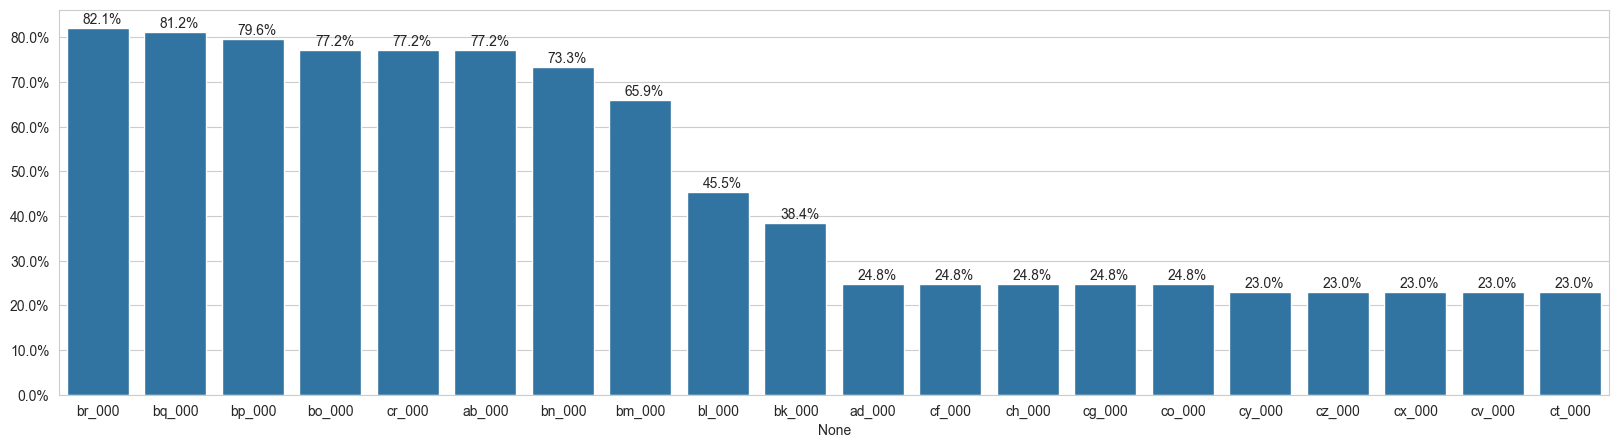

In [6]:
# Plotting a graph showing the top 20 features having highest percentage of missing values 
sns.set_style(style="whitegrid")
plt.figure(figsize=(20,5))

# Plot top 20 missing values
missing_percentage = missing_percentage[missing_percentage > 0]  # Only show features with missing values
missing_percentage = missing_percentage.sort_values(ascending=False)
data_to_plot = missing_percentage.head(20)
plot = sns.barplot(x=data_to_plot.index, y=data_to_plot.values)

# Add annotations above each bar signifying their value (Shetty, 2021)
for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

# Make y-axis more interpretable (Shetty, 2021)
plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs())) 
plt.show()

In [7]:
# Section 4: Class Imbalance Analysis

# Calculate class proportions
class_counts = train_data['class'].value_counts()
class_proportions = class_counts / len(train_data) * 100

print("\n--- Class Distribution (Training Data) ---")
print(class_counts)
print("\n--- Class Proportions (Training Data) ---")
print(class_proportions)


--- Class Distribution (Training Data) ---
class
neg    59000
pos     1000
Name: count, dtype: int64

--- Class Proportions (Training Data) ---
class
neg    98.333333
pos     1.666667
Name: count, dtype: float64


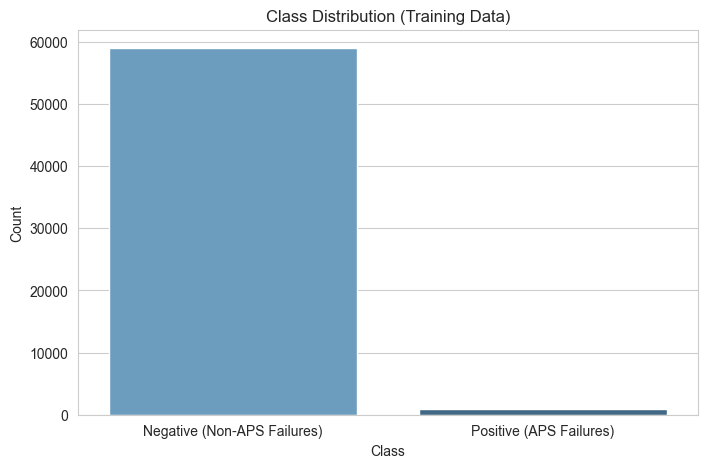

In [8]:
# Visualize class distribution using a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Blues_d")
plt.title("Class Distribution (Training Data)")
plt.ylabel("Count")
plt.xlabel("Class")
plt.xticks(ticks=[0, 1], labels=["Negative (Non-APS Failures)", "Positive (APS Failures)"])
plt.show()

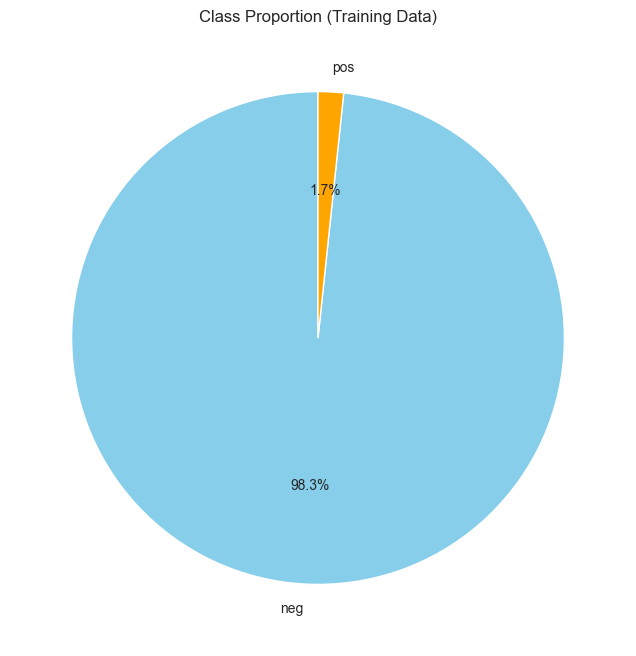

In [9]:
# Visualize class distribution using a pie chart
plt.figure(figsize=(8, 8))
class_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title("Class Proportion (Training Data)")
plt.ylabel("")
plt.show()

In [10]:
# Step 2: Data Cleaning and Missing Value Handling

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from typing import List, Tuple, Dict
import pandas as pd
import json
import os
import logging
from typing import List, Tuple, Dict

logger = logging.getLogger(__name__)

def get_missing_values(
    data: pd.DataFrame,
    label_columns: List[str],
    low_missing_threshold: int = 5,
    moderate_missing_threshold: int = 15,
    high_missing_threshold: int = 70,
    is_training: bool = False,
    verbose: int = 0,
    save_path: str = "missing_values.json"
) -> Tuple[pd.Series, Dict[str, Tuple[int, List[str]]]]:
    ms_values_dict = {}
    if not is_training:
        logger.warning("Training mode turned off. Loading saved missing values dictionary if available.")
        if os.path.exists(save_path):
            with open(save_path, 'r') as file:
                json_dict = json.load(file)
            ms_values_dict = {k: (threshold, features) for k, (threshold, features) in json_dict.items()}
        else:
            logger.warning(f"No missing values file found at {save_path}")
            return pd.Series(), {}
        
    else:
        # Calculate the percentage of missing values, excluding the class column(s)
        missing_percentage = data.drop(columns=label_columns).isnull().mean() * 100

        # Categorize features by the percentage of missing values
        ms_values_dict['low'] = (low_missing_threshold, list(missing_percentage[missing_percentage < low_missing_threshold].index))
        ms_values_dict['moderate'] = (moderate_missing_threshold, list(missing_percentage[(missing_percentage >= low_missing_threshold) &
                                                            (missing_percentage < moderate_missing_threshold)].index))
        ms_values_dict['high'] = (high_missing_threshold, list(missing_percentage[(missing_percentage >= moderate_missing_threshold) &
                                                        (missing_percentage <= high_missing_threshold)].index))
        ms_values_dict['very_high'] = (high_missing_threshold, list(missing_percentage[missing_percentage > high_missing_threshold].index)+ ['cd_000'])

        # Save dictionary to JSON file
        with open(save_path, 'w') as file:
            json.dump(ms_values_dict, file)
            logger.info(f"Missing values dictionary saved to {save_path}")

    # Verbose logging for insights
    if verbose > 0:
        logger.info("\n--- Features Categorized by Missingness ---")
        logger.info(f"Low Missing (<{low_missing_threshold}%): {len(ms_values_dict['low'][1])} features")
        logger.info(f"Moderate Missing ({low_missing_threshold}-{moderate_missing_threshold}%): {len(ms_values_dict['moderate'][1])} features")
        logger.info(f"High Missing ({moderate_missing_threshold}-{high_missing_threshold}%): {len(ms_values_dict['high'][1])} features")
        logger.info(f"Very High Missing (>{high_missing_threshold}%): {len(ms_values_dict['very_high'][1])} features\n\n")


    return ms_values_dict

In [11]:
import joblib
from typing import List
import pandas as pd
from sklearn.impute import SimpleImputer, IterativeImputer

def remove_missing_values(data: pd.DataFrame,
                          label_columns: List[str],
                          low_missing_threshold: int = 5,
                          moderate_missing_threshold: int = 15,
                          high_missing_threshold: int = 70,
                          is_training: bool = False,
                          verbose: int = 0,
                          save_path: str = "missing_values.json") -> pd.DataFrame:
    # Assume get_missing_values is defined elsewhere and provides the necessary structure
    missing_values = get_missing_values(data, label_columns, low_missing_threshold,
                                        moderate_missing_threshold, high_missing_threshold,
                                        is_training, verbose, save_path)
    logger.info(f"Missing_values")
    logger.info(f"\n--- Removing Missing Values ---\nInitial Data Shape: {data.shape}")

    # Drop rows with less than 5% missing values
    if missing_values['low'][1]:  # Ensure there are features in this category
        data_cleaned = data.dropna(subset=missing_values['low'][1], axis=0)
    else:
        raise ValueError(f"Error dropping row with less than 5% missing values:\n{missing_values['low'][0]}")

    # Impute for 5%-15% missing values using median/mode imputation
    if is_training:
        simple_imputer = SimpleImputer(strategy='median')
        if missing_values['moderate'][1]:
            data_cleaned[missing_values['moderate'][1]] = simple_imputer.fit_transform(data_cleaned[missing_values['moderate'][1]])

        # Impute for 15%-70% missing values using MICE (Multiple Imputation by Chained Equations)
        mice_imputer = IterativeImputer(max_iter=10, random_state=42)
        if missing_values['high'][1]:  # Check if there are features to impute
            data_cleaned[missing_values['high'][1]] = mice_imputer.fit_transform(data_cleaned[missing_values['high'][1]])

        joblib.dump(simple_imputer, 'median_imputer.joblib')
        joblib.dump(mice_imputer, 'mice_imputer.joblib')
    else:
        simple_imputer = joblib.load('median_imputer.joblib')
        mice_imputer = joblib.load('mice_imputer.joblib')

        if missing_values['moderate'][1]:
            data_cleaned[missing_values['moderate'][1]] = simple_imputer.transform(data_cleaned[missing_values['moderate'][1]])

        if missing_values['high'][1]:  # Check if there are features to impute
            data_cleaned[missing_values['high'][1]] = mice_imputer.transform(data_cleaned[missing_values['high'][1]])

    # Drop features with >70% missing values
    if missing_values['very_high'][1]:  # Ensure there are features to drop
        data_cleaned.drop(columns=missing_values['very_high'][1], inplace=True)

    if verbose > 0:
        logger.info(f"Dropped rows with <{low_missing_threshold}% missing values: {missing_values['low'][1]}.")
        logger.info(f"Features with median imputation: {missing_values['moderate'][1]}")
        logger.info(f"Features imputed using MICE: {missing_values['high'][1]}")
        logger.info(f"Dropped features due to high missing values: {missing_values['very_high'][1]}")
        logger.info(f"Final Data Shape: {data_cleaned.shape}")

    logger.info(f"\n--- Data cleaning complete. Final shape: {data_cleaned.shape} ---\n\n")
    return data_cleaned

In [12]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Section 1: Handle Outliers

def remove_outliers(data: pd.DataFrame, label_columns:List[str]):
    # Identify numerical features
    numerical_features = data.drop(columns=label_columns, axis=1).select_dtypes(include=['float64', 'int64']).columns

    # Use z-scores to identify outliers
    z_scores = np.abs((data[numerical_features] - data[numerical_features].mean()) / 
                       data[numerical_features].std())

    # Define a threshold for identifying outliers (e.g., z > 3)
    outlier_threshold = 3
    outliers = (z_scores > outlier_threshold).sum()

    logger.info("\n--- Outlier Detection ---")
    logger.info(f"Number of outliers per feature (z > {outlier_threshold}):\n{outliers}")

    # Decide how to handle outliers (capping in this example)
    for feature in numerical_features:
        upper_limit = data[feature].mean() + outlier_threshold * data[feature].std()
        lower_limit = data[feature].mean() - outlier_threshold * data[feature].std()
        data[feature] = np.clip(data[feature], lower_limit, upper_limit)

    print(f"\n--- Outliers have been capped based on z-score thresholds. Shape: {data.shape} ---\n\n")

    return data, numerical_features

In [13]:
def wrangle_dataset(
        data: pd.DataFrame,
        label_columns: List[str],
        low_missing_threshold: int = 5,
        moderate_missing_threshold: int = 15,
        high_missing_threshold: int = 70,
        is_training: bool = False,
        verbose: int = 0,
        save_path: str = "missing_values.json"
):
    cleaned_data = remove_missing_values(data, label_columns, low_missing_threshold,
                                         moderate_missing_threshold, high_missing_threshold,
                                         is_training, verbose, save_path)
    
    cleaned_data, numerical_features = remove_outliers(data=cleaned_data, label_columns=label_columns)
    return cleaned_data, numerical_features


# Ensure train_data is a valid DataFrame before running this
train_data_cleaned, numerical_features = wrangle_dataset(
    data=train_data, 
    label_columns=['class'], 
    is_training=True, 
    verbose=1
)


train_data_cleaned.info()

2025-02-04 16:51:48,918 - INFO - Missing values dictionary saved to missing_values.json
2025-02-04 16:51:48,921 - INFO - 
--- Features Categorized by Missingness ---
2025-02-04 16:51:48,925 - INFO - Low Missing (<5%): 128 features
2025-02-04 16:51:48,927 - INFO - Moderate Missing (5-15%): 14 features
2025-02-04 16:51:48,928 - INFO - High Missing (15-70%): 21 features
2025-02-04 16:51:48,929 - INFO - Very High Missing (>70%): 8 features


2025-02-04 16:51:48,930 - INFO - Missing_values
2025-02-04 16:51:48,931 - INFO - 
--- Removing Missing Values ---
Initial Data Shape: (60000, 171)
2025-02-04 16:52:16,173 - INFO - Dropped rows with <5% missing values: ['aa_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', '


--- Outliers have been capped based on z-score thresholds. Shape: (55936, 163) ---


<class 'pandas.core.frame.DataFrame'>
Index: 55936 entries, 0 to 59999
Columns: 163 entries, class to eg_000
dtypes: float64(162), object(1)
memory usage: 70.0+ MB


In [14]:
# Example Usage
# Ensure train_data is a valid DataFrame before running this
test_data_cleaned, numerical_features = wrangle_dataset(
    data=test_data, 
    label_columns=['class'], 
    is_training=False, 
    verbose=1
)

test_data_cleaned.info()

2025-02-04 16:52:18,464 - WARNING - Training mode turned off. Loading saved missing values dictionary if available.
2025-02-04 16:52:18,481 - INFO - 
--- Features Categorized by Missingness ---
2025-02-04 16:52:18,483 - INFO - Low Missing (<5%): 128 features
2025-02-04 16:52:18,484 - INFO - Moderate Missing (5-15%): 14 features
2025-02-04 16:52:18,485 - INFO - High Missing (15-70%): 21 features
2025-02-04 16:52:18,488 - INFO - Very High Missing (>70%): 8 features


2025-02-04 16:52:18,489 - INFO - Missing_values
2025-02-04 16:52:18,490 - INFO - 
--- Removing Missing Values ---
Initial Data Shape: (16000, 171)
2025-02-04 16:52:19,305 - INFO - Dropped rows with <5% missing values: ['aa_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay


--- Outliers have been capped based on z-score thresholds. Shape: (14891, 163) ---


<class 'pandas.core.frame.DataFrame'>
Index: 14891 entries, 0 to 15999
Columns: 163 entries, class to eg_000
dtypes: float64(162), object(1)
memory usage: 18.6+ MB


## Step 3: Exploratory Data Analysis (EDA)

In [15]:
from collections import Counter
# Extract feature prefixes
feature_prefix_counts = Counter([name.split('_')[0] for name in train_data_cleaned.columns])

In [16]:
# Get unique feature prefixes and their counts
feature_prefixes = list(feature_prefix_counts.keys())
bin_counts = list(feature_prefix_counts.values())

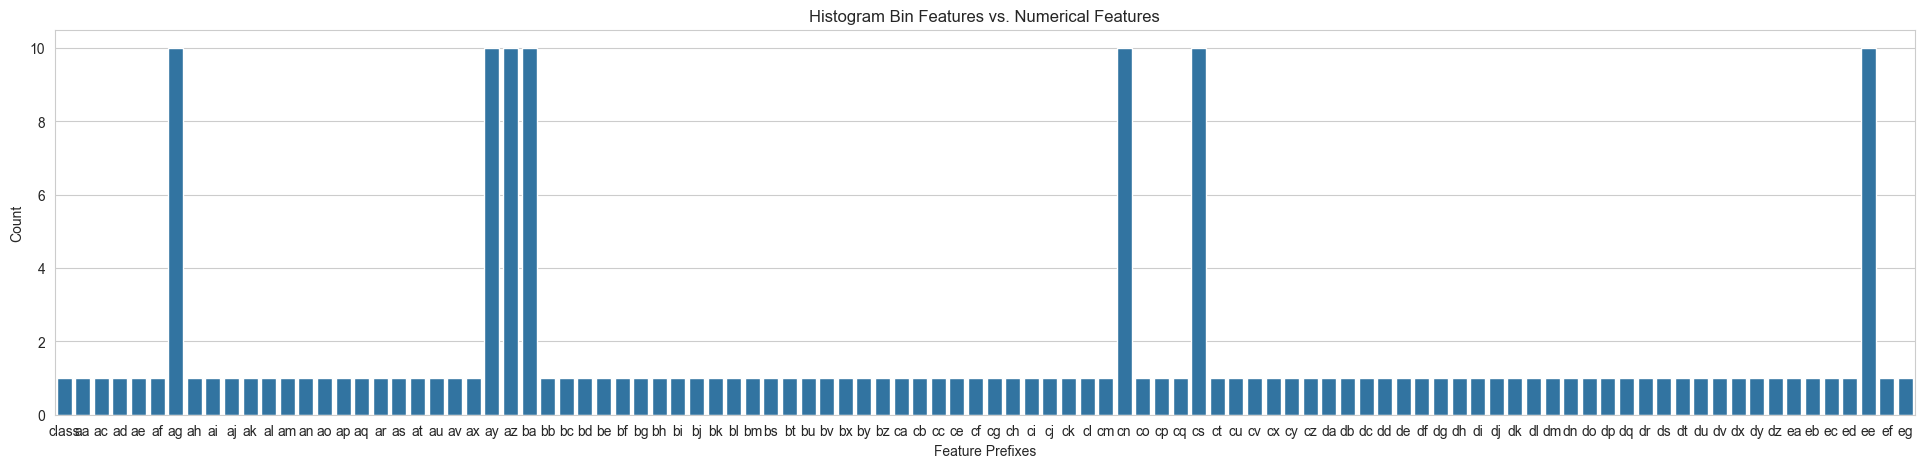

In [17]:
# Plot the feature distribution
plt.figure(figsize=(24, 5))
sns.barplot(x=feature_prefixes, y=bin_counts)
plt.xlabel("Feature Prefixes")
plt.ylabel("Count")
plt.title("Histogram Bin Features vs. Numerical Features")
plt.show()

In [18]:
# Identify histogram features based on bin count
hist_identifiers = [prefix for prefix, count in zip(feature_prefixes, bin_counts) if count == 10]
print("The Histogram Identifiers are:", hist_identifiers)

# Extract feature names containing histogram bin information
hist_features = [col for col in train_data_cleaned.columns if col.split('_')[0] in hist_identifiers]
print(f"\nThere are {len(hist_features)} features that contain histogram bin information:\n{hist_features}")

The Histogram Identifiers are: ['ag', 'ay', 'az', 'ba', 'cn', 'cs', 'ee']

There are 70 features that contain histogram bin information:
['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']


In [19]:
# Convert the target column ('class') to binary (0 for 'neg', 1 for 'pos')
train_data_cleaned['class'] = train_data_cleaned['class'].map({'neg':0, 'pos':1})
train_data_cleaned['class'].value_counts()

class
0    55340
1      596
Name: count, dtype: int64

In [20]:
# Define feature matrix (X) and target variable (y)
X_train = train_data_cleaned.drop('class', axis=1)
y_train = train_data_cleaned['class']

In [21]:
# Separating the top features from the datasets
histogram_data = X_train[hist_features]
x_without_hist = X_train.drop(hist_features,axis=1)

histogram_data

ag_000  ag_001  ag_002  ag_003   ag_004     ag_005     ag_006  \
0         0.0     0.0     0.0     0.0  37250.0  1432864.0  3664156.0   
1         0.0     0.0     0.0     0.0  18254.0   653294.0  1720800.0   
2         0.0     0.0     0.0     0.0   1648.0   370592.0  1883374.0   
3         0.0     0.0     0.0   318.0   2212.0     3232.0     1872.0   
4         0.0     0.0     0.0     0.0  43752.0  1966618.0  1800340.0   
...       ...     ...     ...     ...      ...        ...        ...   
59995     0.0     0.0     0.0  2564.0  59100.0  1603216.0  6015982.0   
59996     0.0     0.0     0.0     0.0    104.0    99186.0    36564.0   
59997     0.0     0.0     0.0     0.0     28.0    11592.0    11538.0   
59998     0.0     0.0     0.0     0.0    330.0   202498.0  3251010.0   
59999     0.0     0.0     0.0     0.0   1226.0    46284.0  1901140.0   

          ag_007    ag_008   ag_009  ...     ee_000     ee_001     ee_002  \
0      1007684.0   25896.0      0.0  ...   965866.0  1706908.0  1240520.0   
1       516724.0   31642.0      0.0  ...   664504.0   824154.0   421400.0   
2       292936.0   12016.0      0.0  ...   262032.0   453378.0   277378.0   
3            0.0       0.0      0.0  ...     5670.0     1566.0      240.0   
4       131646.0    4588.0      0.0  ...   404740.0   904230.0   622012.0   
...          ...       ...      ...  ...        ...        ...        ...   
59995  1968266.0  164972.0  12560.0  ...  1608808.0  1479066.0   998500.0   
59996      128.0       0.0      0.0  ...    13934.0    15024.0    10578.0   
59997        0.0       0.0      0.0  ...    15876.0     2740.0      792.0   
59998  2061456.0  360436.0  59754.0  ...  1180714.0  1709450.0   699352.0   
59999   855376.0   61744.0   6318.0  ...   409798.0   686416.0   440066.0   

         ee_003     ee_004     ee_005     ee_006    ee_007    ee_008  \
0      493384.0   721044.0   469792.0   339156.0  157956.0   73224.0   
1      178064.0   293306.0   245416.0   133654.0   81140.0   97576.0   
2      159812.0   423992.0   409564.0   320746.0  158022.0   95128.0   
3          46.0       58.0       44.0       10.0       0.0       0.0   
4      229790.0   405298.0   347188.0   286954.0  311560.0  433954.0   
...         ...        ...        ...        ...       ...       ...   
59995  566884.0  1290398.0  1218244.0  1019768.0  717762.0  898642.0   
59996    6760.0    21126.0    68424.0      136.0       0.0       0.0   
59997     386.0      452.0      144.0      146.0    2622.0       0.0   
59998  222654.0   347378.0   225724.0   194440.0  165070.0  802280.0   
59999  183200.0   344546.0   254068.0   225148.0  158304.0  170384.0   

             ee_009  
0           0.00000  
1        1500.00000  
2         514.00000  
3           0.00000  
4        1218.00000  
...             ...  
59995   28588.00000  
59996       0.00000  
59997       0.00000  
59998  128558.94912  
59999     158.00000  

[55936 rows x 70 columns]

In [22]:
def plot_importance_score(data: pd.Series):
    plt.figure(figsize=(12, 8))
    plot = sns.barplot(x=data.values, y=data.index, palette="Blues_d", orient='h')

    # Add annotations above each bar
    for p in plot.patches:
        plot.annotate(
            '{:.4f}%'.format(p.get_width()),  # Format score as a percentage
            (p.get_width(), p.get_y() + p.get_height() / 2),  # Properly position annotation
            ha='left', va='center', fontsize=10, color='black', weight='bold'
        )

    plt.title('Features Importance Scores')
    plt.xlabel('Scores')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

2025-02-04 16:52:23,458 - INFO - Starting feature selection process...
2025-02-04 16:53:34,786 - INFO - --- Mutual Information Scores ---
cs_002    0.026299
ba_002    0.024931
ba_003    0.024887
cs_004    0.024808
ag_005    0.024540
            ...   
ay_003    0.001927
ay_001    0.001741
ay_000    0.001374
az_009    0.001318
cs_009    0.000368
Name: Mutual_Info_Score, Length: 70, dtype: float64


Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 fe

2025-02-04 17:05:12,015 - INFO - 
--- Top Features Selected by RFE ---
['ag_002', 'ag_004', 'ay_002', 'ay_005', 'ay_006', 'ay_008', 'az_001', 'az_003', 'ba_002', 'ba_008', 'cn_007', 'cs_002', 'ee_002', 'ee_005', 'ee_007']
2025-02-04 17:06:32,155 - INFO - 
--- Top Features Selected by SelectKBest ---
Index(['ag_005', 'az_000', 'az_001', 'az_002', 'az_005', 'ba_000', 'ba_001',
       'ba_002', 'ba_003', 'ba_004', 'cn_003', 'cs_002', 'cs_003', 'cs_004',
       'ee_000'],
      dtype='object')
2025-02-04 17:06:32,155 - INFO - 
--- Combined Selected Features ---
Total: 27
['az_005', 'ba_000', 'cs_003', 'az_001', 'cs_004', 'cs_002', 'ay_005', 'ag_004', 'cn_007', 'ay_002', 'ay_008', 'az_002', 'ag_002', 'ee_002', 'az_000', 'ba_003', 'ba_001', 'ba_004', 'ee_005', 'ay_006', 'ba_008', 'cn_003', 'ee_007', 'ee_000', 'ag_005', 'az_003', 'ba_002']


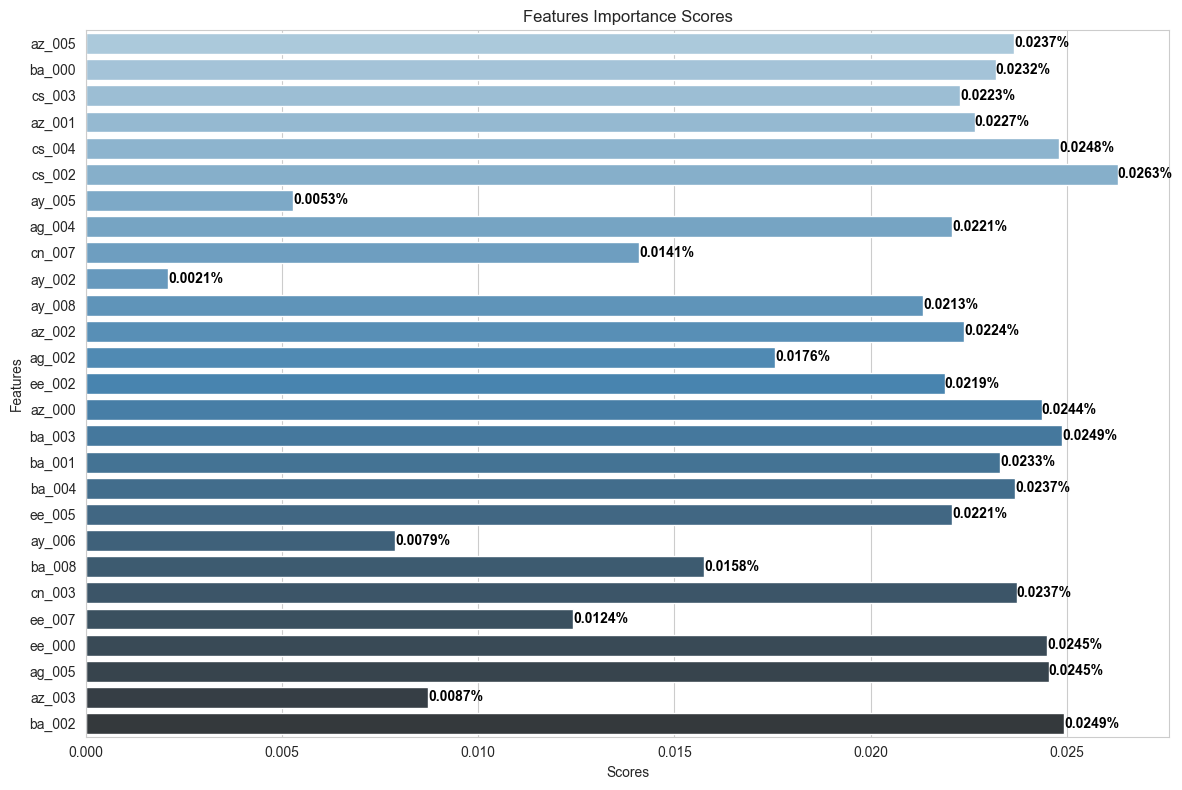

In [23]:
import pandas as pd
import logging
from sklearn.feature_selection import RFE, mutual_info_classif, SelectKBest
from sklearn.tree import DecisionTreeClassifier

def select_top_k_features(data: pd.DataFrame, y: pd.Series, n_selection: int, 
                          plot_scores: bool = True, verbose: int = 3) -> pd.Series:
    logger.info("Starting feature selection process...")

    # Mutual Information Scores
    mutual_info_scores = mutual_info_classif(data, y)
    mutual_info_scores = pd.Series(data=mutual_info_scores, index=data.columns, name='Mutual_Info_Score')
    mutual_info_scores.sort_values(ascending=False, inplace=True)
    logger.info(f"--- Mutual Information Scores ---\n{mutual_info_scores}")

    # Recursive Feature Elimination (RFE) with Decision Tree
    estimator = DecisionTreeClassifier(random_state=42)
    rfe_selector = RFE(
        estimator=estimator,
        n_features_to_select=n_selection,
        step=1,  
        verbose=verbose
    )
    rfe_selector.fit(data, y)

    # Get top selected features from RFE
    rfe_selected_features = data.columns[rfe_selector.support_].tolist()
    logger.info(f"\n--- Top Features Selected by RFE ---\n{rfe_selected_features}")

    # SelectKBest for Mutual Information Scores
    kbest_selector = SelectKBest(mutual_info_classif, k=n_selection)
    kbest_selector.fit(data, y)
    selected_kbest_cols = data.columns[kbest_selector.get_support()]
    logger.info(f"\n--- Top Features Selected by SelectKBest ---\n{selected_kbest_cols}")

    # Combine selected features from both methods
    selected_features = list(set(rfe_selected_features).union(selected_kbest_cols))

    logger.info(f"\n--- Combined Selected Features ---\nTotal: {len(selected_features)}\n{selected_features}")

    selected_features_df = mutual_info_scores.loc[selected_features]
    if plot_scores:
        if "plot_importance_score" in globals():
            plot_importance_score(selected_features_df)
        else:
            logger.warning("plot_importance_score function is not defined!")

    return selected_features_df

# Call the function
selected_features_df = select_top_k_features(data=histogram_data, y=y_train, n_selection=15)
selected_features = selected_features_df.index.tolist()



Feature: az_005
Class 0 - Mean: 1327084.52, Std Dev: 2412810.4
Class 1 - Mean: 10594228.32, Std Dev: 5859895.62


2025-02-04 17:06:36,920 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:06:37,008 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


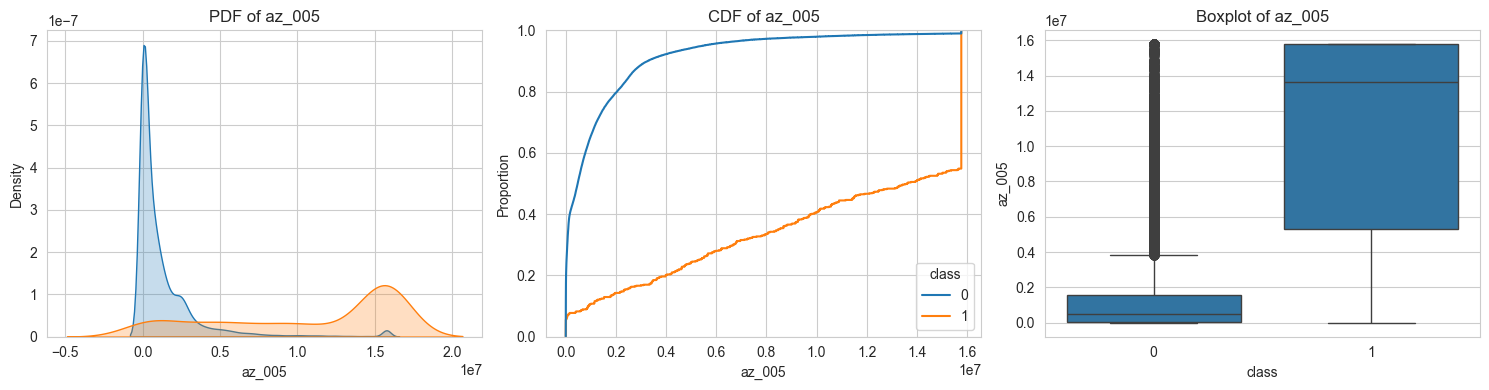


Feature: ba_000
Class 0 - Mean: 946087.81, Std Dev: 1472533.98
Class 1 - Mean: 6518263.98, Std Dev: 3520398.31


2025-02-04 17:06:40,639 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:06:40,727 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


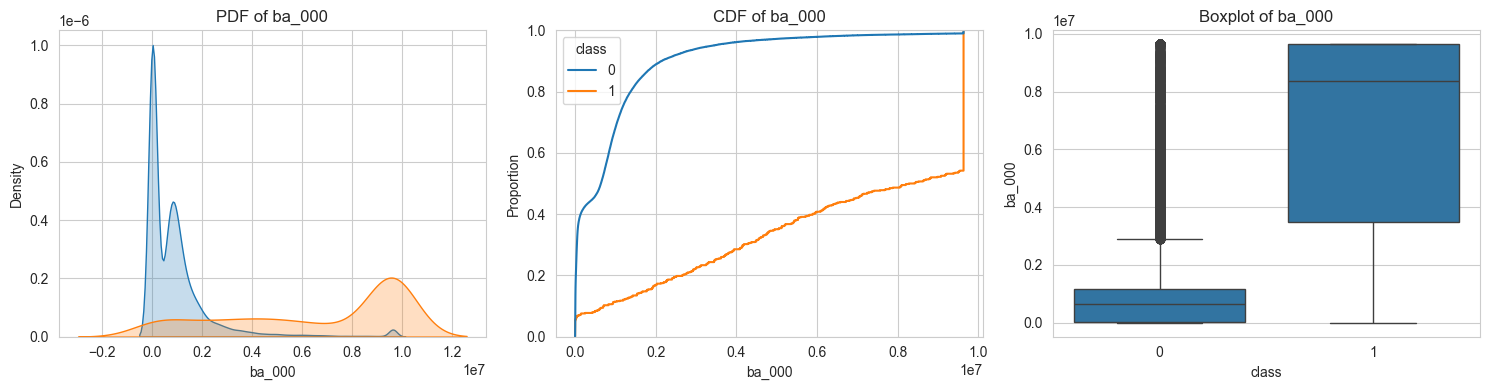


Feature: cs_003
Class 0 - Mean: 227171.95, Std Dev: 388066.59
Class 1 - Mean: 1615576.08, Std Dev: 900390.88


2025-02-04 17:06:43,987 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:06:44,074 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


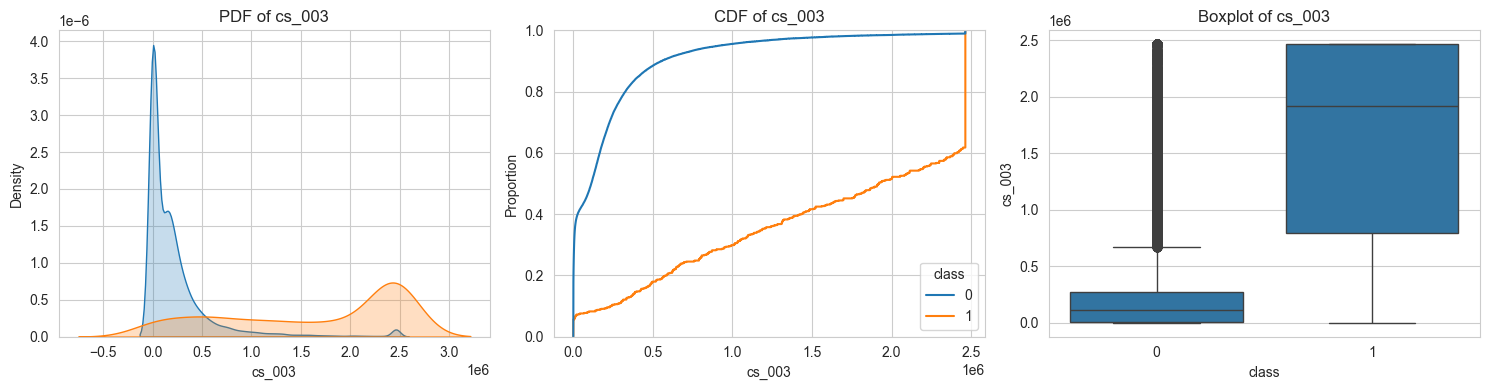


Feature: az_001
Class 0 - Mean: 2171.77, Std Dev: 5947.25
Class 1 - Mean: 29546.83, Std Dev: 23398.07


2025-02-04 17:06:47,016 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:06:47,105 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


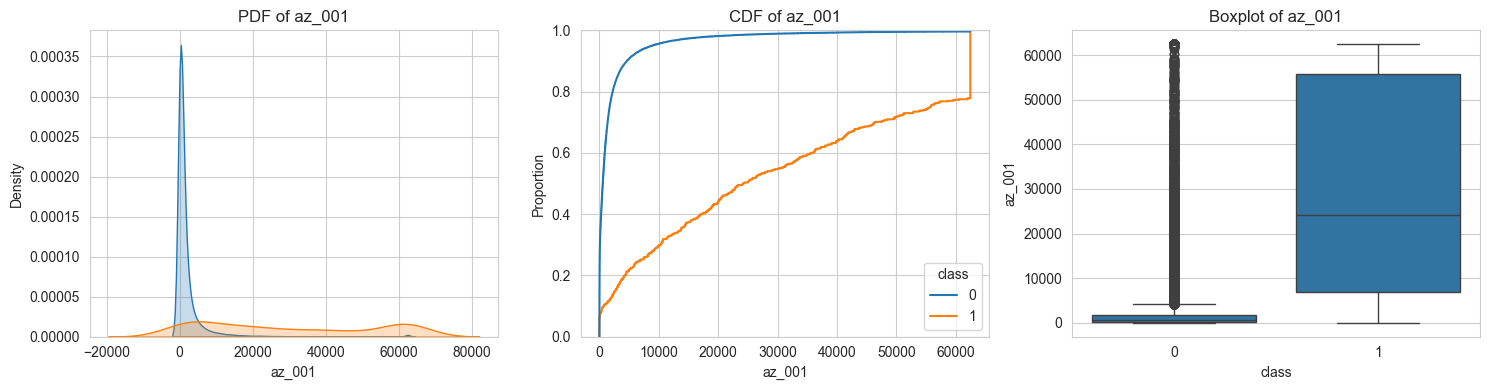


Feature: cs_004
Class 0 - Mean: 205035.99, Std Dev: 540146.55
Class 1 - Mean: 2687322.51, Std Dev: 1865010.05


2025-02-04 17:06:50,325 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:06:50,436 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


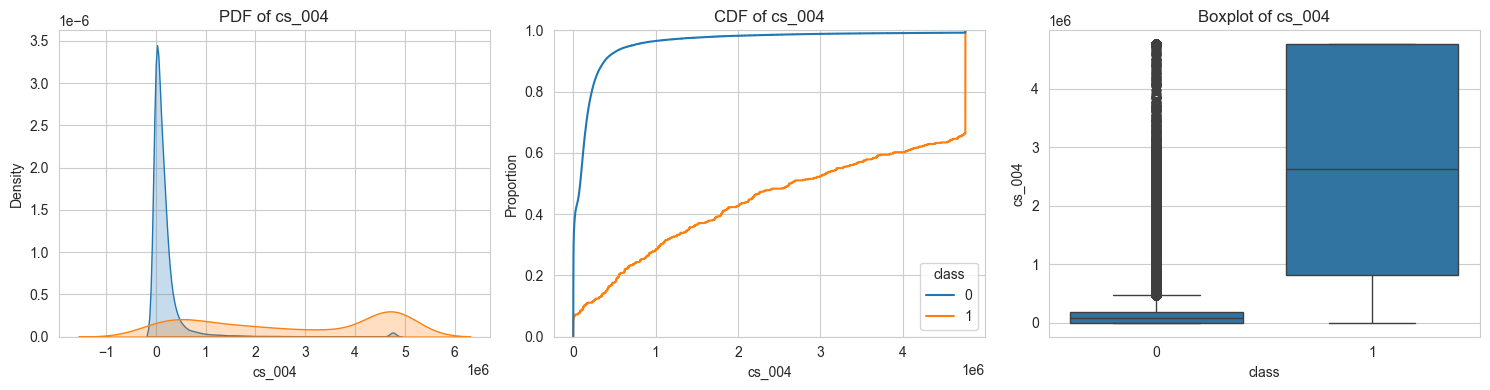


Feature: cs_002
Class 0 - Mean: 104252.27, Std Dev: 302517.17
Class 1 - Mean: 1624227.23, Std Dev: 1012979.6


2025-02-04 17:06:54,081 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:06:54,222 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


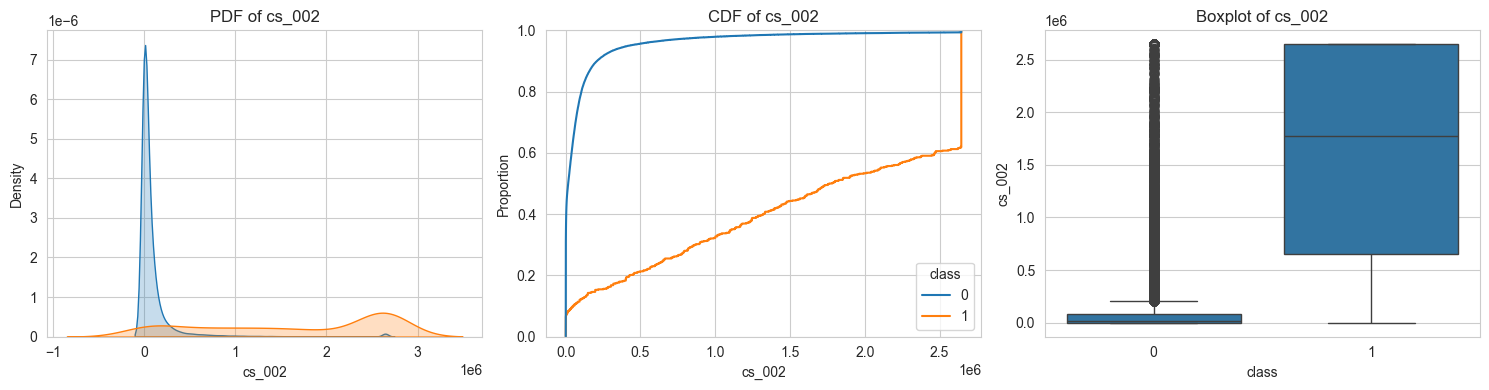


Feature: ay_005
Class 0 - Mean: 48905.89, Std Dev: 154233.71
Class 1 - Mean: 301377.55, Std Dev: 673758.72


2025-02-04 17:06:57,019 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:06:57,099 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


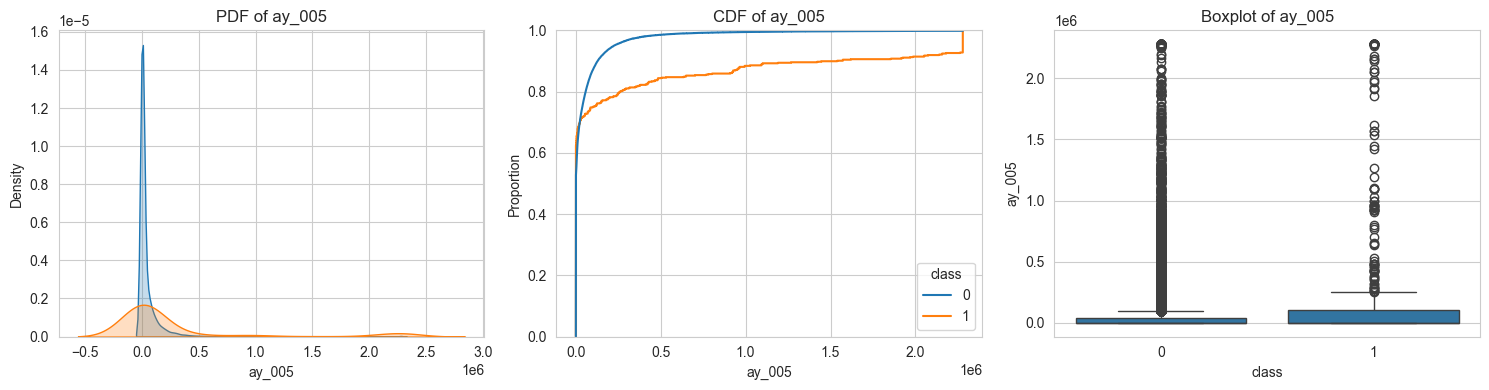


Feature: ag_004
Class 0 - Mean: 177864.92, Std Dev: 711312.84
Class 1 - Mean: 2990868.85, Std Dev: 2342599.3


2025-02-04 17:07:00,554 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:07:00,639 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


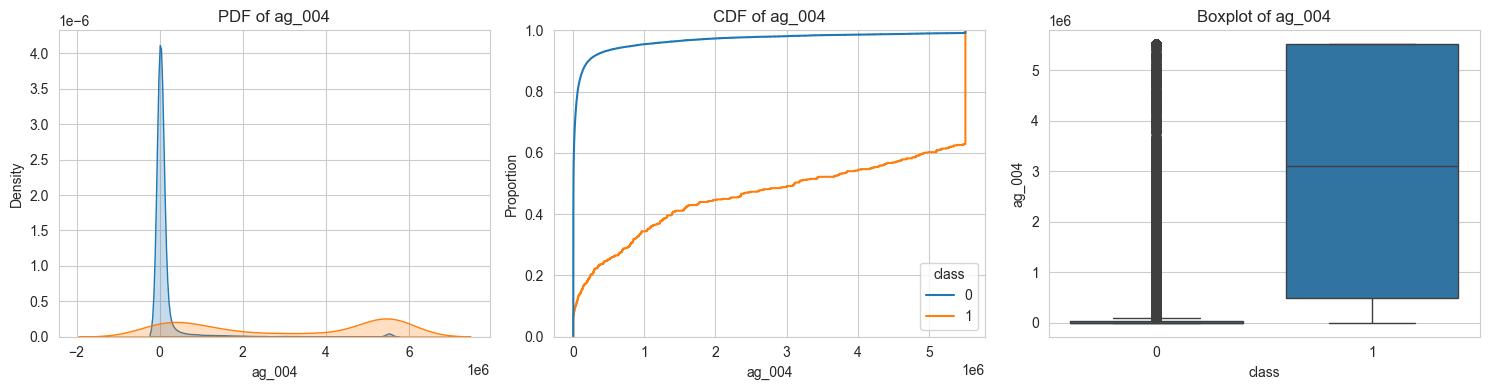


Feature: cn_007
Class 0 - Mean: 37302.56, Std Dev: 117119.6
Class 1 - Mean: 367807.99, Std Dev: 433203.27


2025-02-04 17:07:03,685 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:07:03,788 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


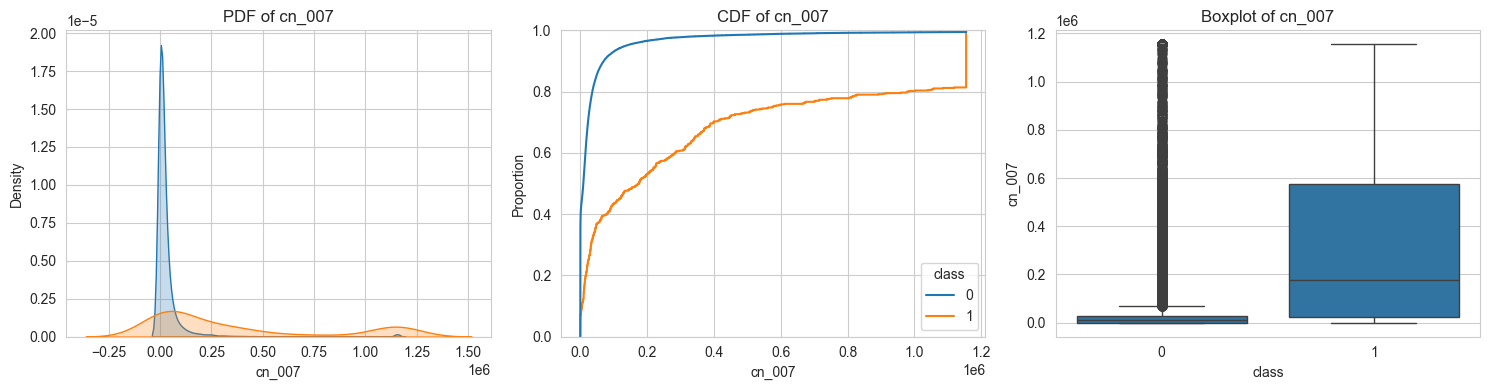


Feature: ay_002
Class 0 - Mean: 979.71, Std Dev: 26902.12
Class 1 - Mean: 65842.22, Std Dev: 275662.32


2025-02-04 17:07:06,542 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:07:06,619 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


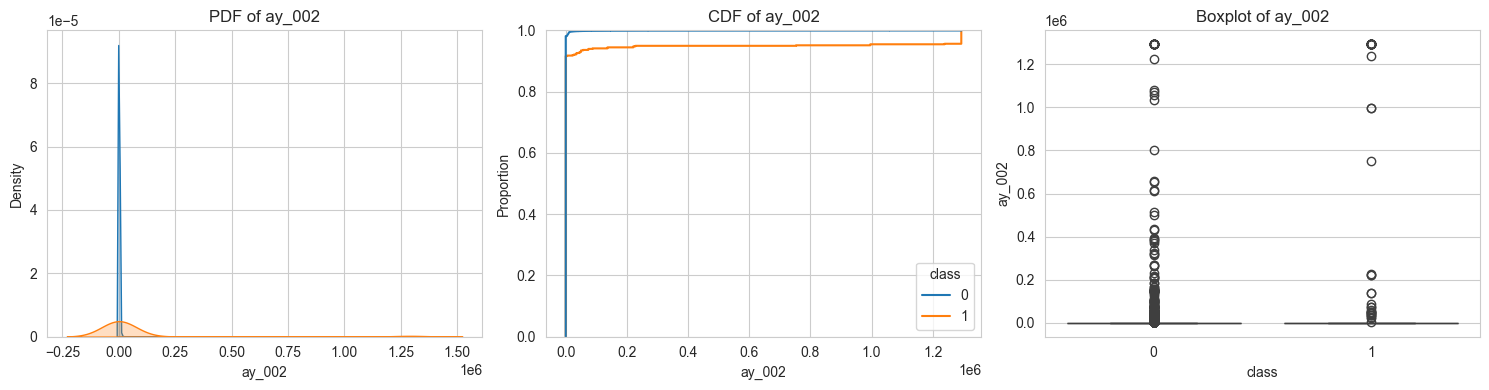


Feature: ay_008
Class 0 - Mean: 586480.31, Std Dev: 1367972.68
Class 1 - Mean: 6120848.48, Std Dev: 3859848.57


2025-02-04 17:07:09,854 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:07:09,984 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


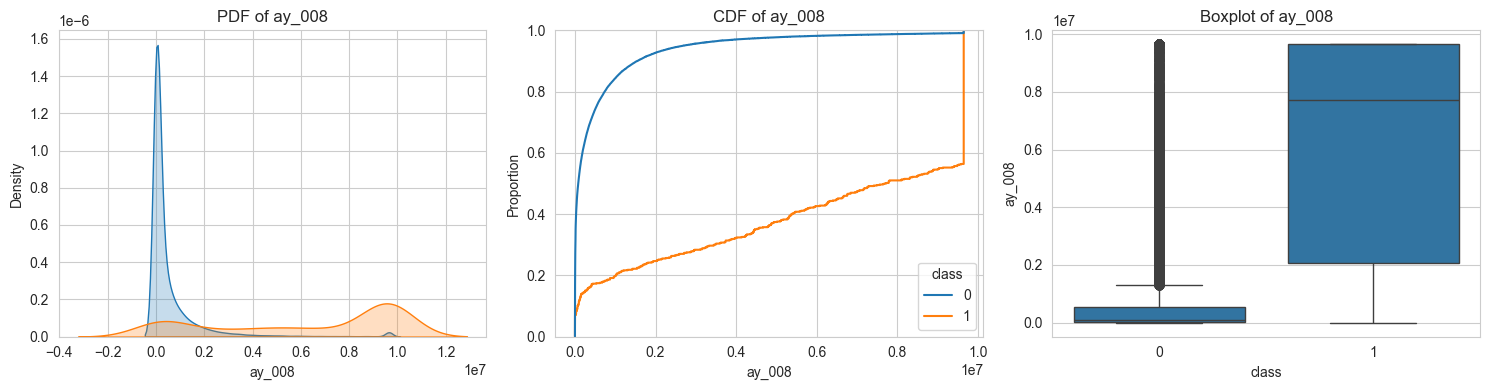


Feature: az_002
Class 0 - Mean: 3679.24, Std Dev: 12477.07
Class 1 - Mean: 62491.23, Std Dev: 69103.97


2025-02-04 17:07:12,582 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:07:12,662 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


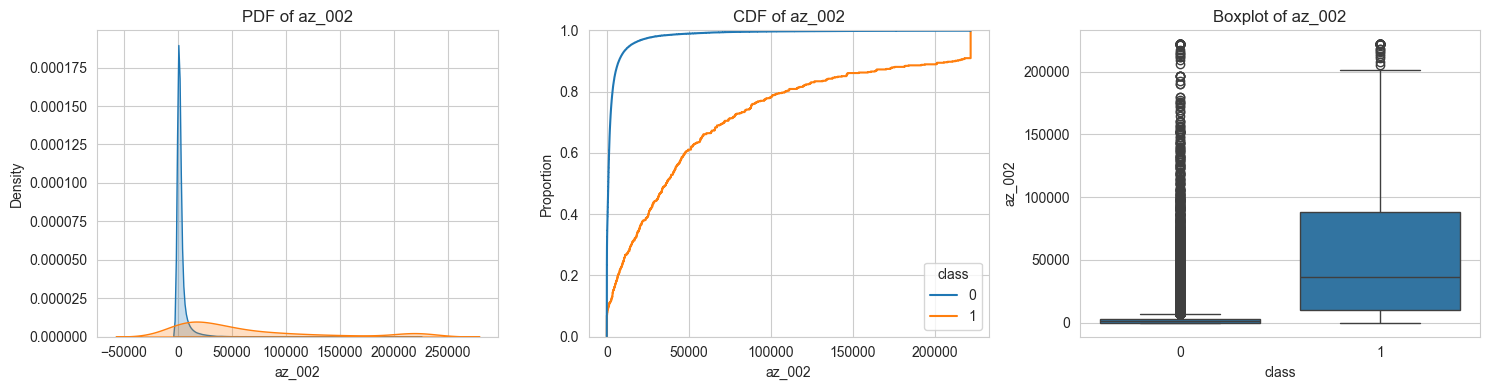


Feature: ag_002
Class 0 - Mean: 921.23, Std Dev: 11790.91
Class 1 - Mean: 99295.65, Std Dev: 127166.33


2025-02-04 17:07:16,615 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:07:16,737 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


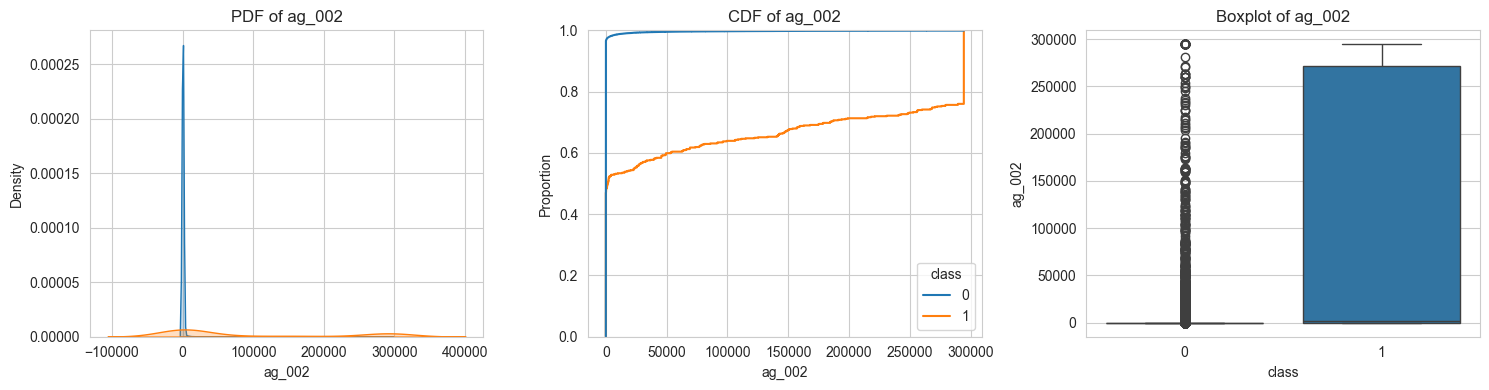


Feature: ee_002
Class 0 - Mean: 306233.04, Std Dev: 453072.71
Class 1 - Mean: 1854181.83, Std Dev: 1082530.44


2025-02-04 17:07:21,988 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:07:22,119 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


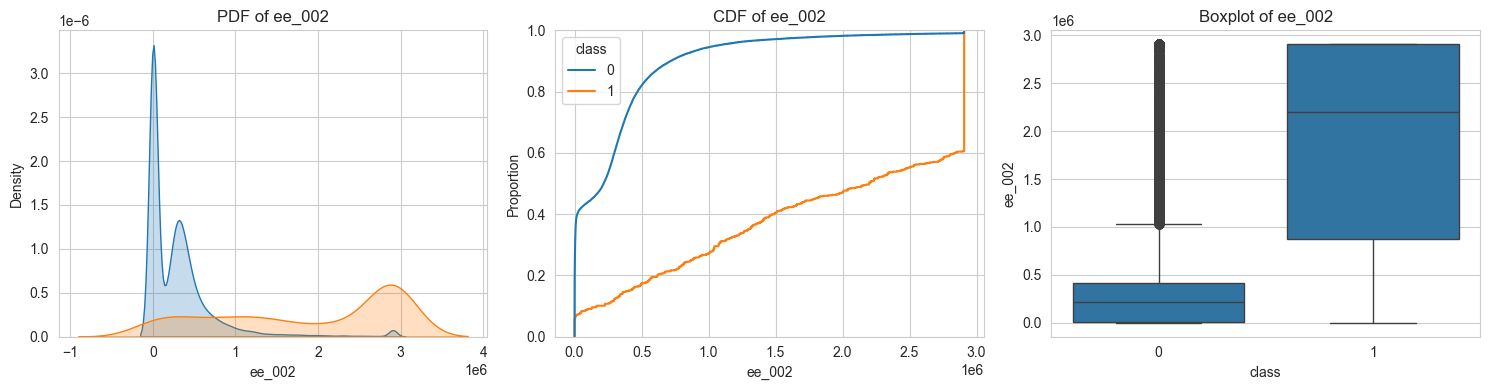


Feature: az_000
Class 0 - Mean: 4113.24, Std Dev: 10272.3
Class 1 - Mean: 55453.29, Std Dev: 50907.67


2025-02-04 17:07:25,912 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:07:26,105 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


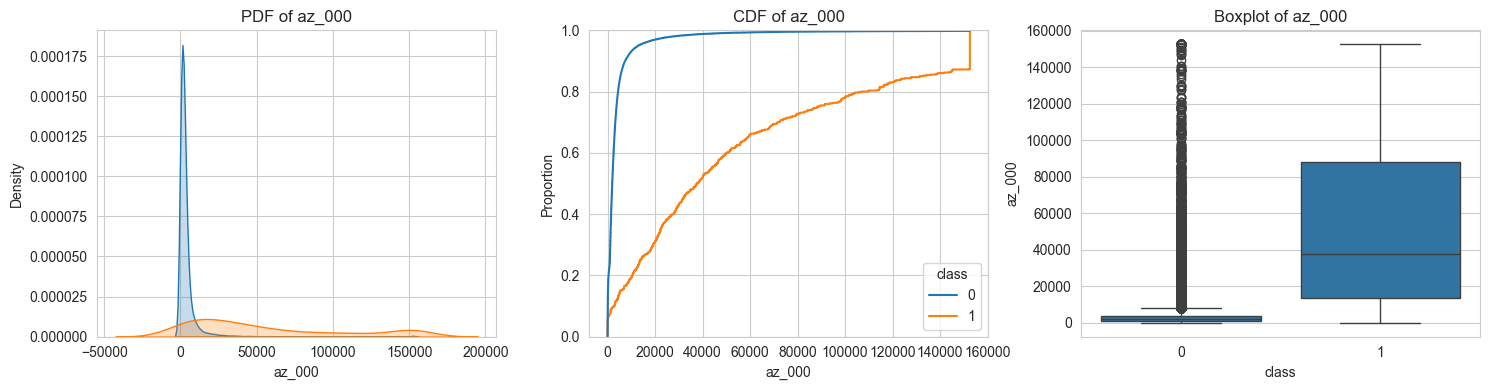


Feature: ba_003
Class 0 - Mean: 174931.57, Std Dev: 262686.09
Class 1 - Mean: 1165446.46, Std Dev: 591149.8


2025-02-04 17:07:29,915 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:07:29,997 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


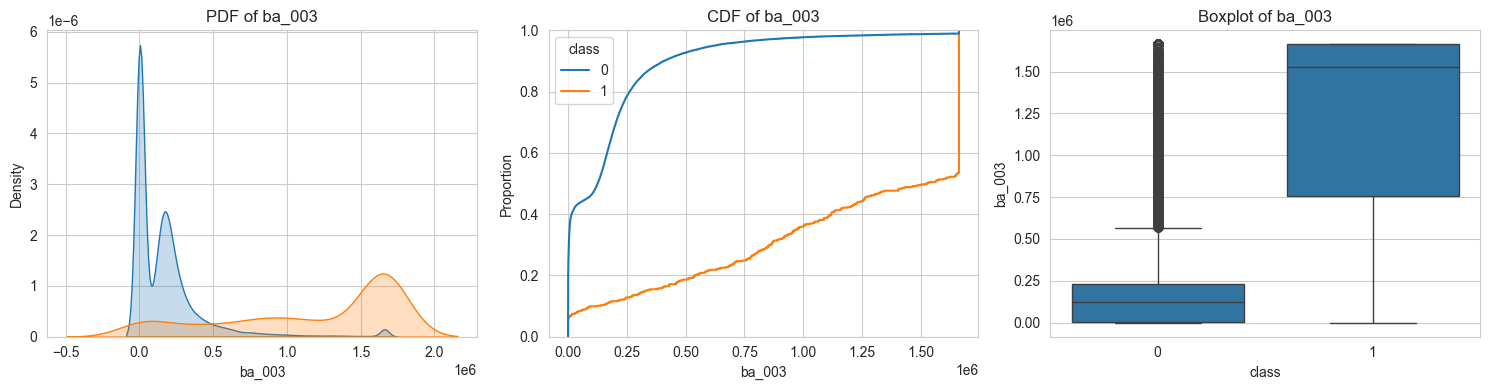


Feature: ba_001
Class 0 - Mean: 589463.33, Std Dev: 868279.41
Class 1 - Mean: 3763311.7, Std Dev: 1926866.25


2025-02-04 17:07:33,888 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:07:34,434 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


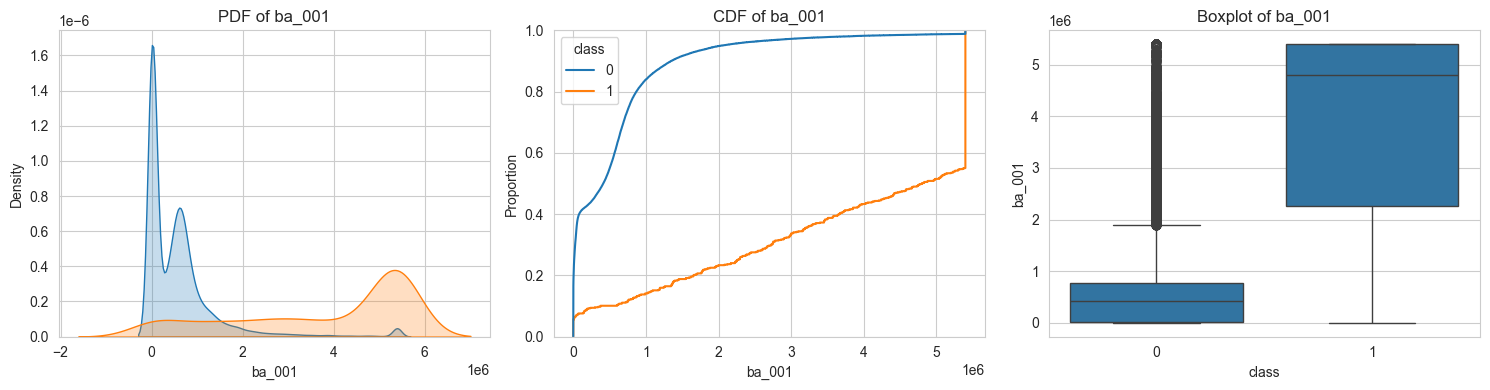


Feature: ba_004
Class 0 - Mean: 135852.42, Std Dev: 200144.14
Class 1 - Mean: 838808.52, Std Dev: 446858.1


2025-02-04 17:07:38,373 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:07:38,463 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


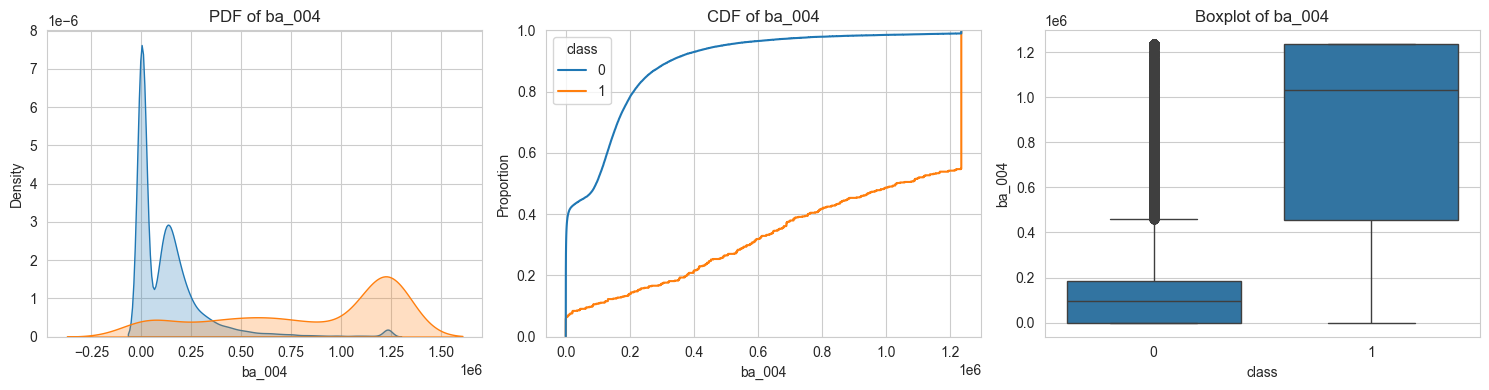


Feature: ee_005
Class 0 - Mean: 274215.65, Std Dev: 393568.27
Class 1 - Mean: 1699401.77, Std Dev: 1035584.43


2025-02-04 17:07:42,017 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:07:42,154 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


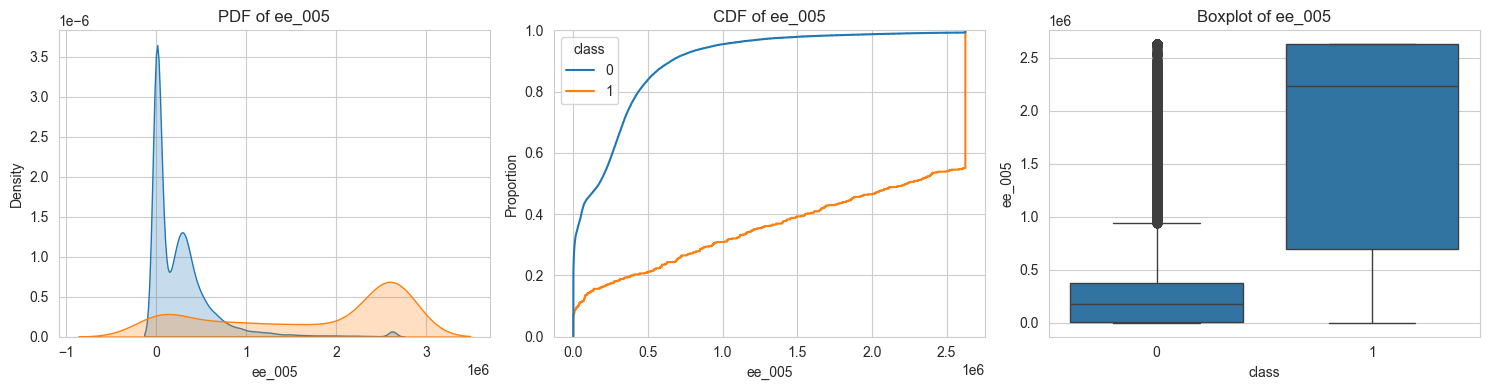


Feature: ay_006
Class 0 - Mean: 827244.52, Std Dev: 1283793.02
Class 1 - Mean: 1860523.81, Std Dev: 3035459.06


2025-02-04 17:07:46,198 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:07:46,303 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


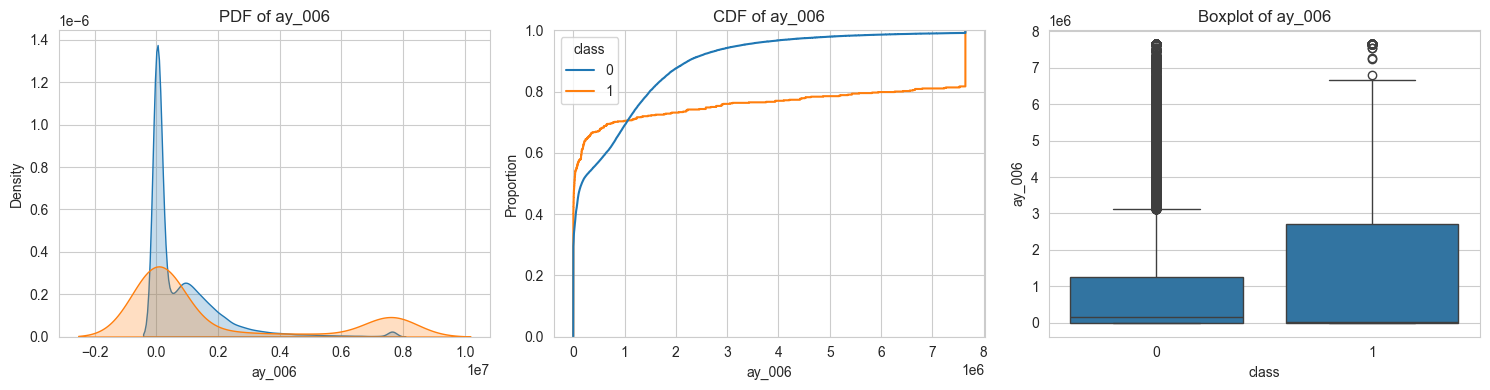


Feature: ba_008
Class 0 - Mean: 16728.03, Std Dev: 66532.6
Class 1 - Mean: 253312.74, Std Dev: 236171.96


2025-02-04 17:07:51,115 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:07:51,482 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


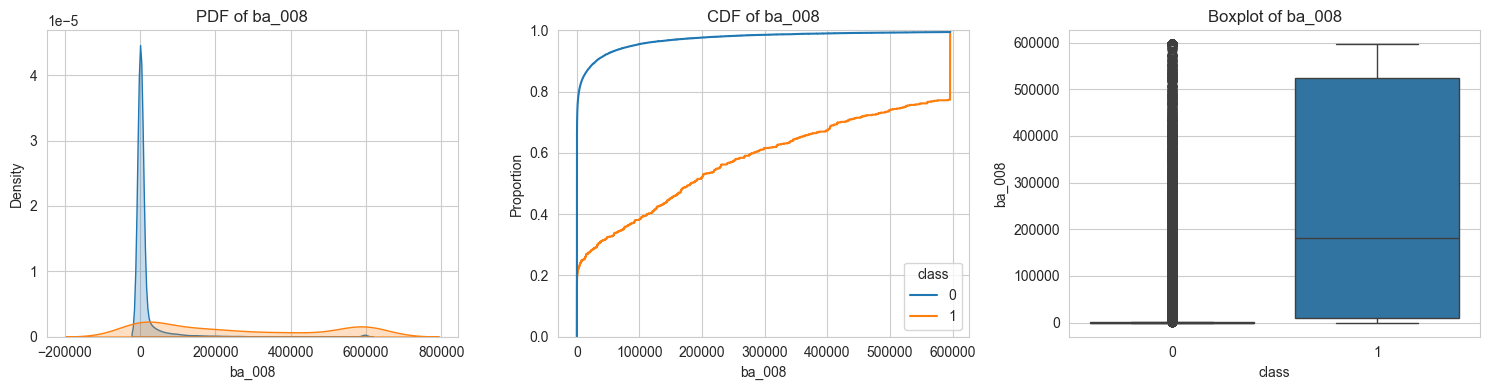


Feature: cn_003
Class 0 - Mean: 260751.18, Std Dev: 676823.03
Class 1 - Mean: 3048206.52, Std Dev: 1856041.61


2025-02-04 17:07:54,838 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:07:55,014 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


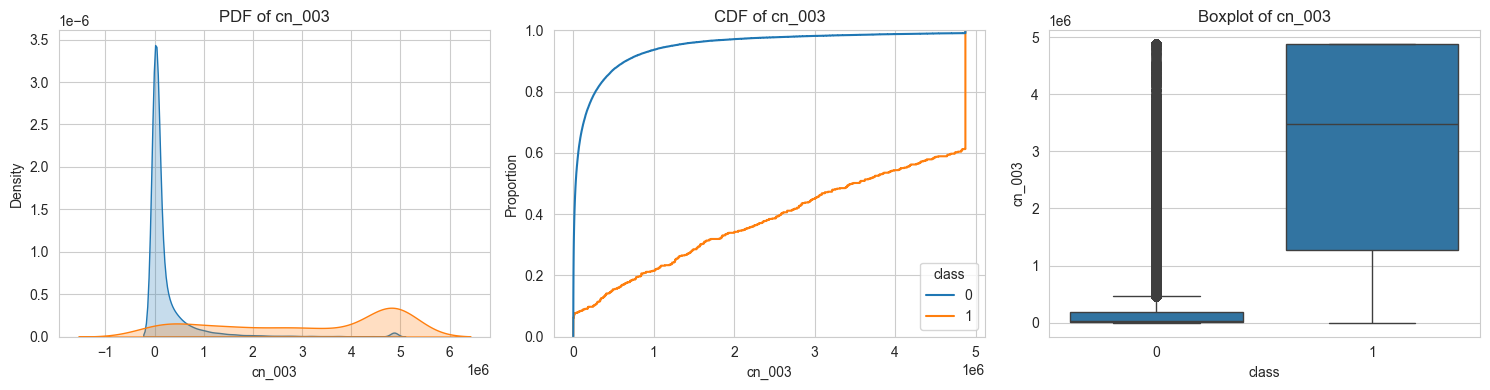


Feature: ee_007
Class 0 - Mean: 174434.37, Std Dev: 484325.76
Class 1 - Mean: 1260042.51, Std Dev: 1384523.08


2025-02-04 17:07:58,579 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:07:58,694 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


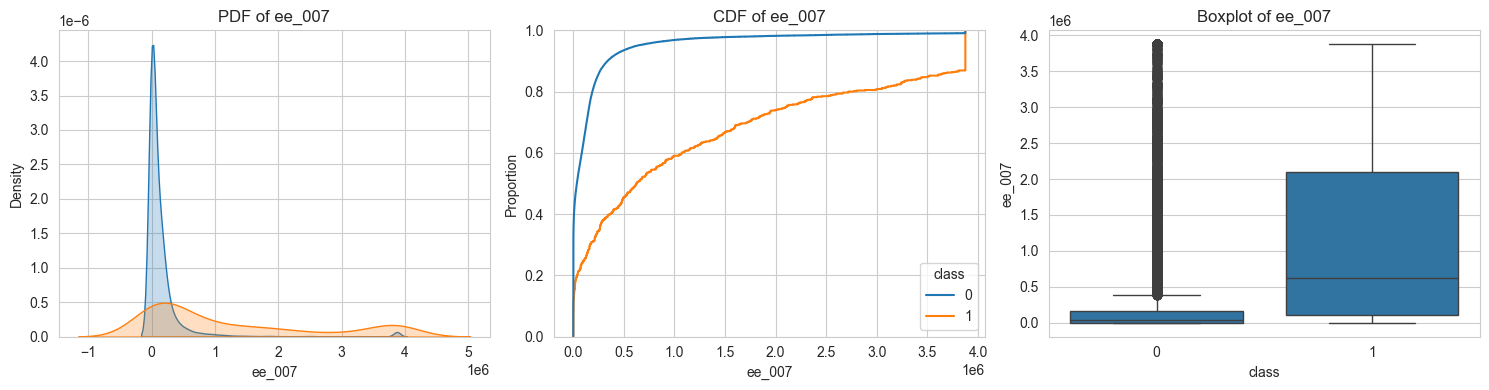


Feature: ee_000
Class 0 - Mean: 444468.81, Std Dev: 764033.85
Class 1 - Mean: 3585103.51, Std Dev: 1900469.21


2025-02-04 17:08:02,300 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:08:02,394 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


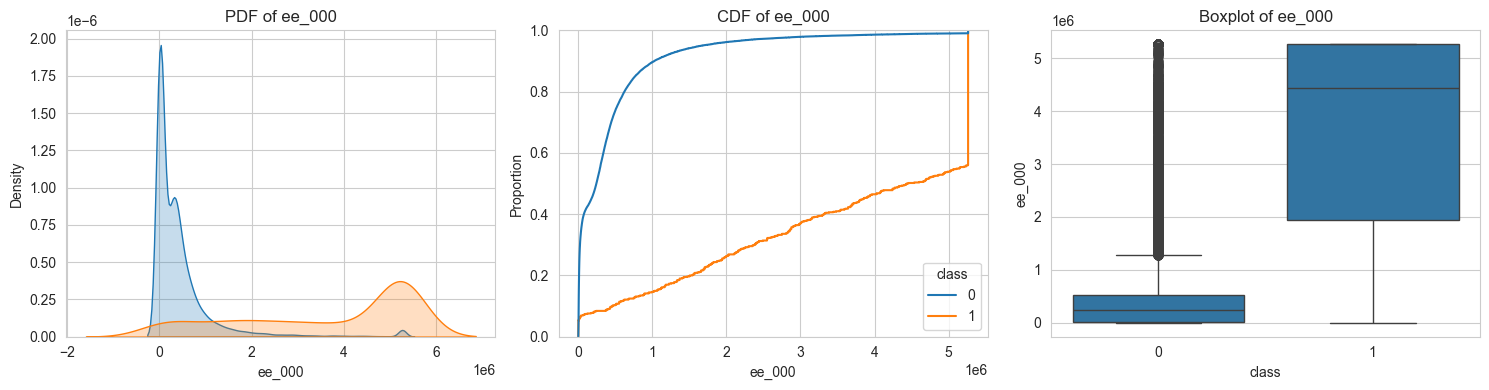


Feature: ag_005
Class 0 - Mean: 673667.09, Std Dev: 1268774.82
Class 1 - Mean: 5467078.98, Std Dev: 2821820.41


2025-02-04 17:08:05,781 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:08:05,865 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


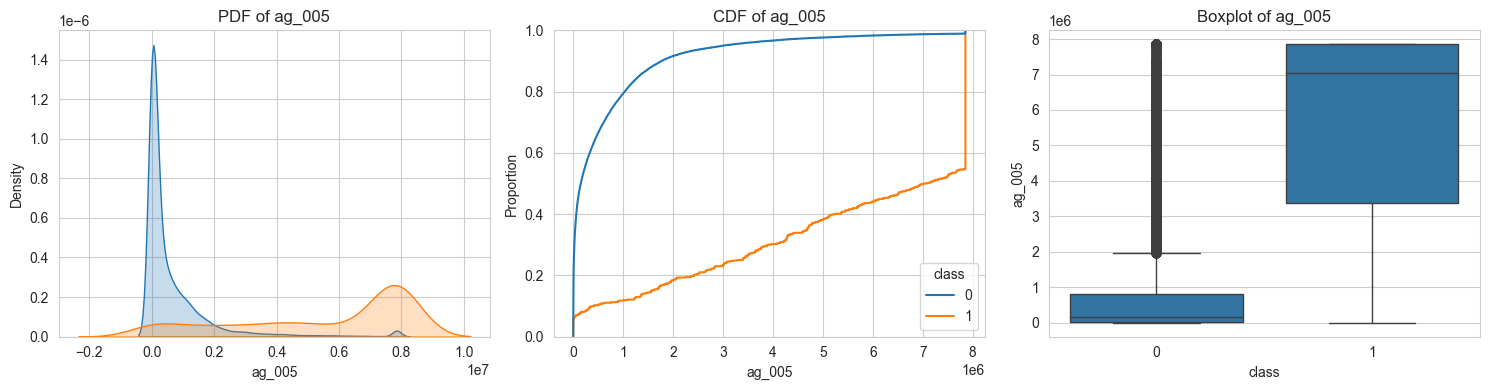


Feature: az_003
Class 0 - Mean: 55657.64, Std Dev: 143415.85
Class 1 - Mean: 210253.21, Std Dev: 330013.06


2025-02-04 17:08:08,903 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:08:09,059 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


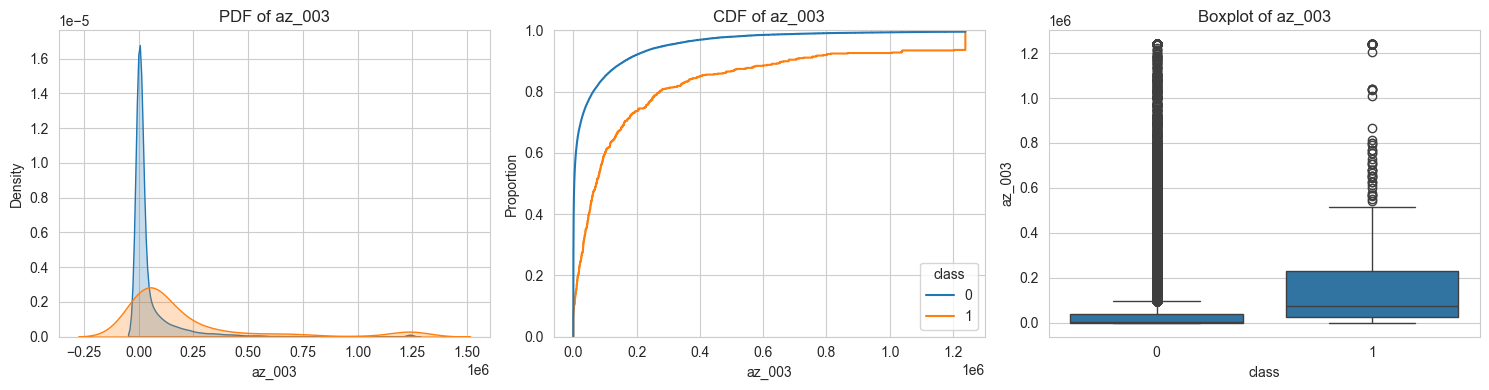


Feature: ba_002
Class 0 - Mean: 252747.15, Std Dev: 399245.77
Class 1 - Mean: 1821248.6, Std Dev: 925573.73


2025-02-04 17:08:12,760 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:08:12,859 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


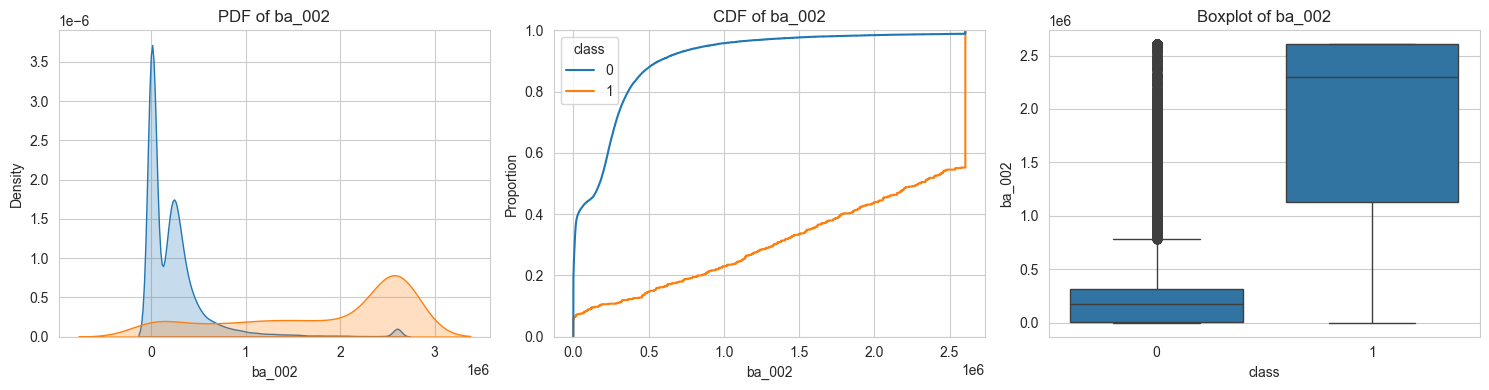

In [24]:
def univariate_analysis(df, target_column):
    """
    Perform univariate analysis on selected numerical features.
    - Print mean and standard deviation for each class.
    - Plot PDF, CDF, and boxplots for each feature.
    """
    for feature in df.columns:
        if feature != target_column:
            # Descriptive statistics by class
            describe_0 = df[df[target_column] == 0][feature].describe()
            describe_1 = df[df[target_column] == 1][feature].describe()

            print(f"\nFeature: {feature}")
            print(f"Class 0 - Mean: {round(describe_0['mean'], 2)}, Std Dev: {round(describe_0['std'], 2)}")
            print(f"Class 1 - Mean: {round(describe_1['mean'], 2)}, Std Dev: {round(describe_1['std'], 2)}")

            # Plot PDF, CDF, and boxplot
            fig, ax = plt.subplots(1, 3, figsize=(15, 4))
            sns.kdeplot(df[df[target_column] == 0][feature], ax=ax[0], label="Class 0", shade=True)
            sns.kdeplot(df[df[target_column] == 1][feature], ax=ax[0], label="Class 1", shade=True)
            ax[0].set_title(f"PDF of {feature}")

            sns.ecdfplot(data=df, x=feature, hue=target_column, ax=ax[1])
            ax[1].set_title(f"CDF of {feature}")

            sns.boxplot(x=target_column, y=feature, data=df, ax=ax[2])
            ax[2].set_title(f"Boxplot of {feature}")

            plt.tight_layout()
            plt.show()

# Perform univariate analysis on selected features
univariate_analysis(train_data_cleaned[selected_features + ['class']], 'class')


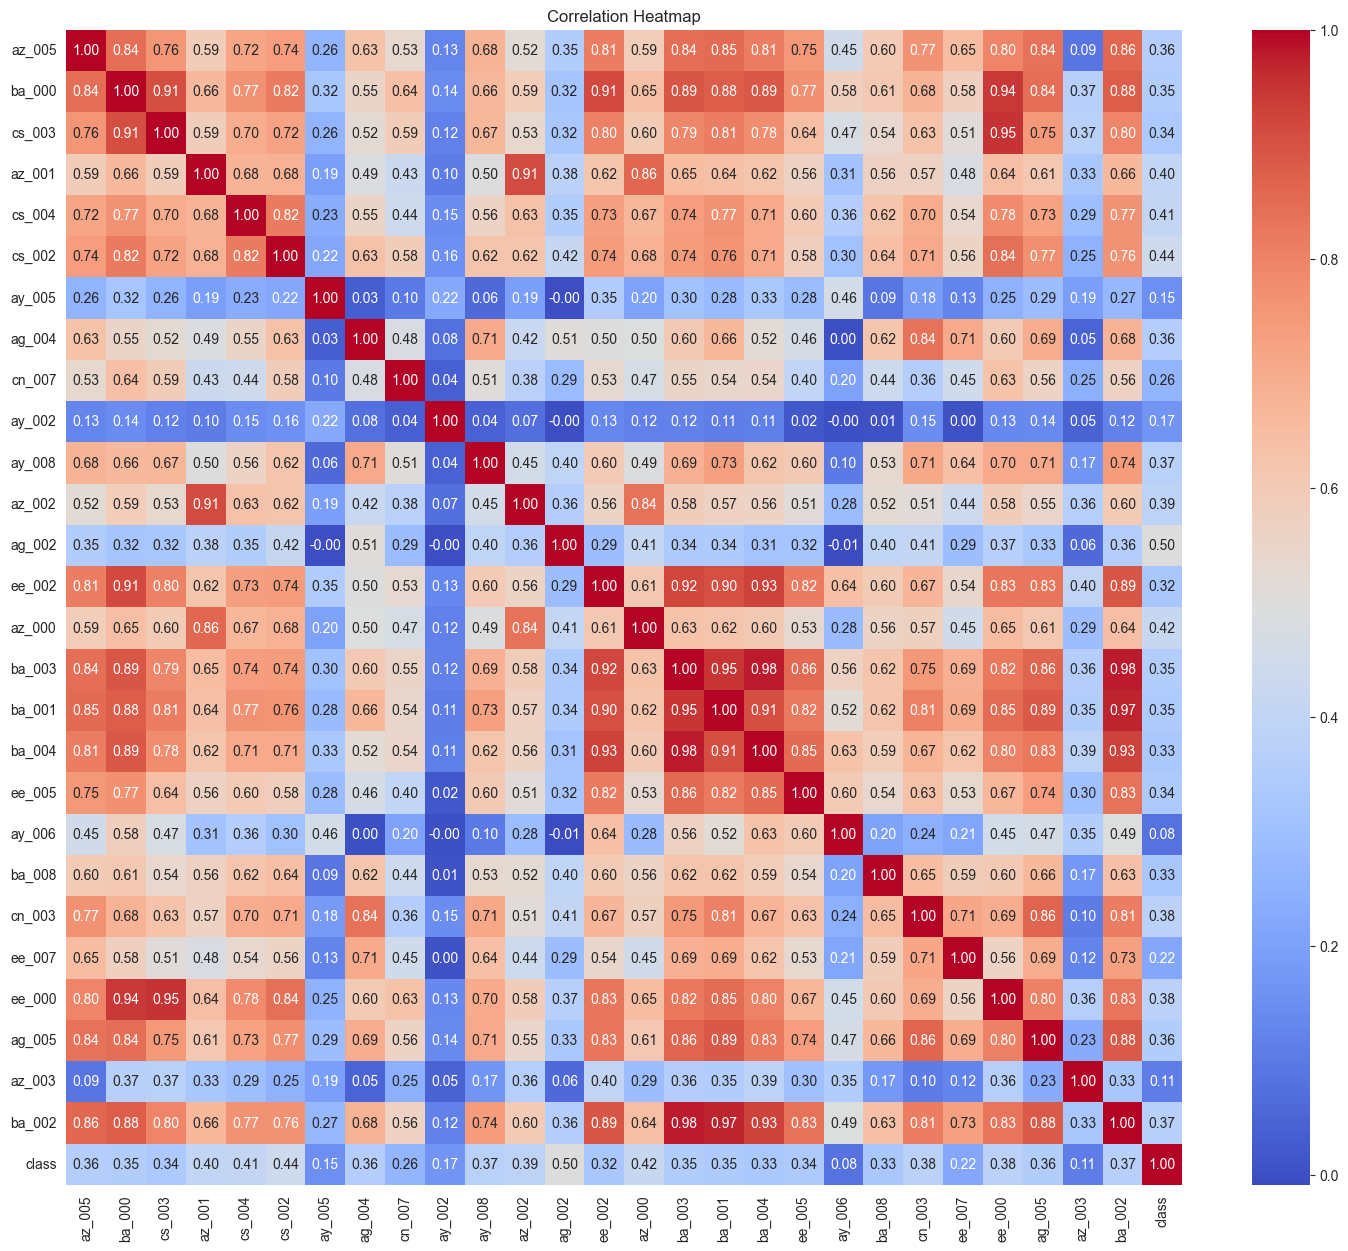

2025-02-04 17:08:20,377 - INFO - Top 5 uncorrelated features:
ay_006    0.080430
az_003    0.107604
ay_005    0.152126
ay_002    0.168143
ee_007    0.216570
Name: class, dtype: float64
2025-02-04 17:08:20,379 - INFO - The most uncorrelated feature is: ay_006


In [25]:
def correlation_matrix(data: pd.DataFrame, n_select: int = 5, plot: bool=True):
    # Compute pairwise correlations between selected features
    correlation_matrix = data.corr()
    correlation_values = correlation_matrix.loc[:, 'class']

    # Visualize correlations using a heatmap
    if plot:
        plt.figure(figsize=(18, 15))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title("Correlation Heatmap")
        plt.show()
        

    top_correlated_features_with_score = correlation_values.sort_values().iloc[:n_select]
    logger.info(f"Top 5 uncorrelated features:\n{top_correlated_features_with_score}")

    top_n_correlated_features = top_correlated_features_with_score.index.tolist()
    logger.info(f"The most uncorrelated feature is: {top_n_correlated_features[0]}")

    return top_n_correlated_features

selected_features_df = train_data_cleaned[selected_features+['class']]
top_correlated_features = correlation_matrix(data=selected_features_df)

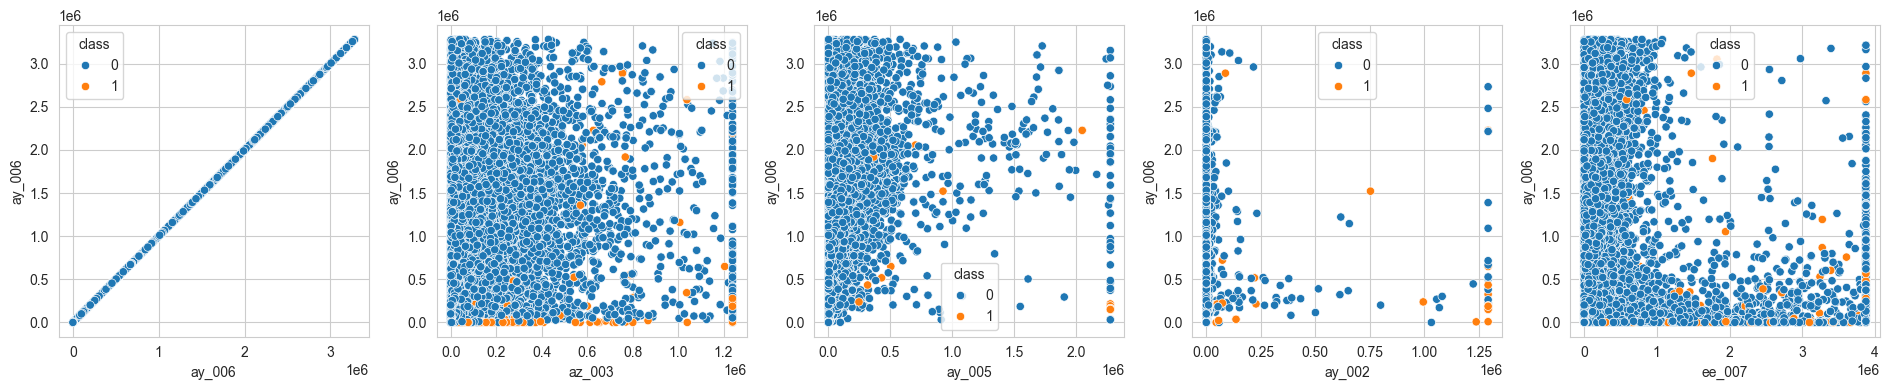

In [26]:
from typing import List

def scatter_plot(data:pd.DataFrame, feature: str, percentile: int):

    threshold = np.nanpercentile(data[feature], percentile)

    data = data[data[feature] < threshold]

    fig, ax = plt.subplots(1, 5, figsize=(19, 4))

    columns = data.columns.tolist()
    for i, col in enumerate(columns):  # Limit to the number of created axes
        if col != 'class':
            sns.scatterplot(x=data[col], y=data[feature], hue=data['class'], ax=ax[i])
    plt.tight_layout()
    plt.show()

top_uncorr_df = selected_features_df[top_correlated_features + ['class']]
scatter_plot(data=top_uncorr_df, feature=top_correlated_features[0], percentile=95)

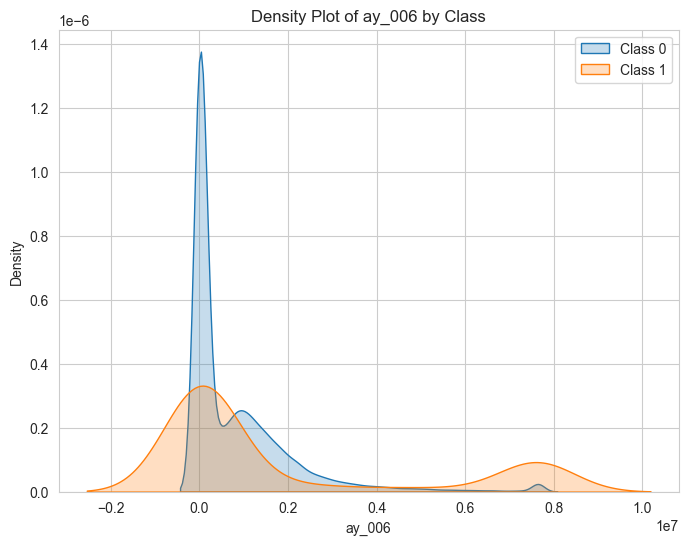

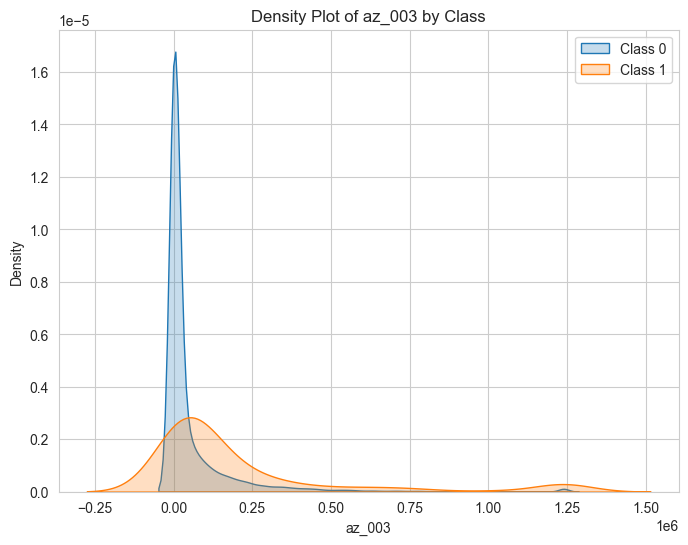

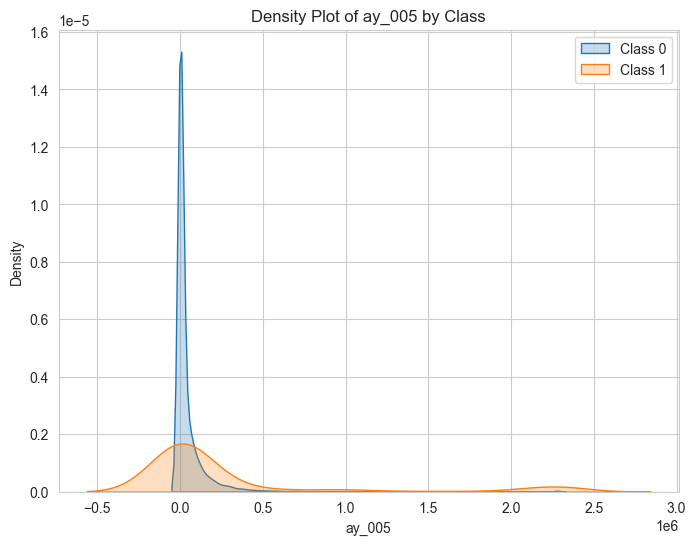

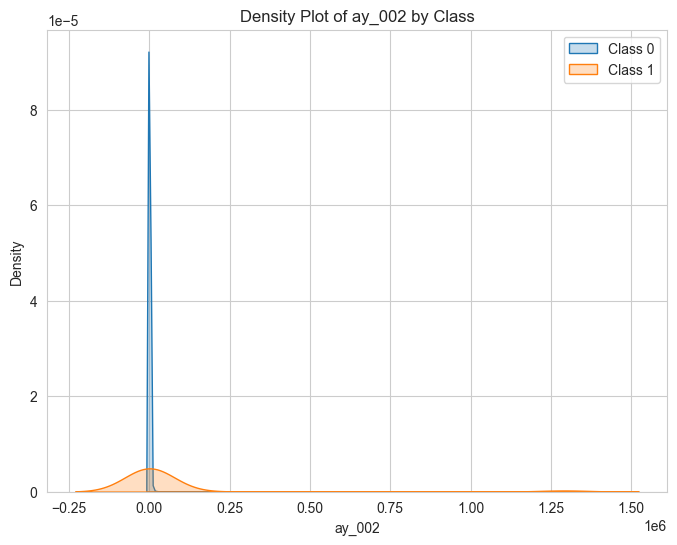

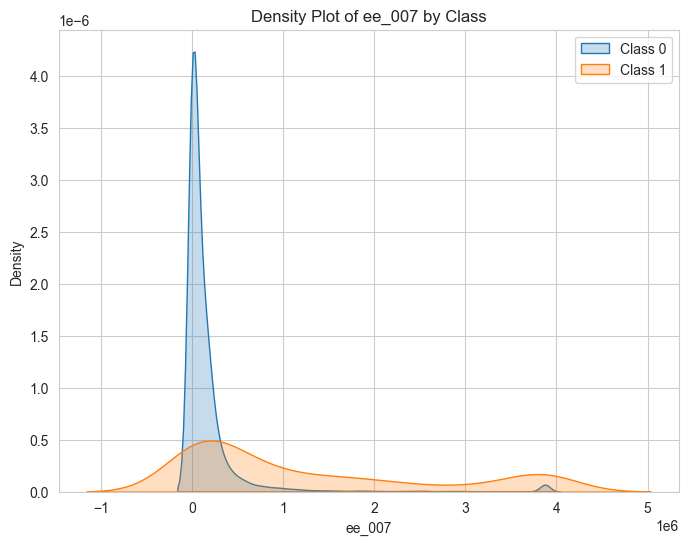

In [27]:
def visualize_class_distributions(df, feature_list):
    """
    Visualize how selected features differ across classes.
    """
    for feature in feature_list:
        plt.figure(figsize=(8, 6))
        sns.kdeplot(data=df[df['class'] == 0], x=feature, label="Class 0", shade=True)
        sns.kdeplot(data=df[df['class'] == 1], x=feature, label="Class 1", shade=True)
        plt.title(f"Density Plot of {feature} by Class")
        plt.legend()
        plt.show()

visualize_class_distributions(train_data_cleaned[top_correlated_features + ['class']], top_correlated_features)

2025-02-04 17:08:57,250 - INFO - Starting feature selection process...
2025-02-04 17:10:31,385 - INFO - --- Mutual Information Scores ---
bj_000    0.032815
dn_000    0.031770
ap_000    0.031509
bh_000    0.030973
bv_000    0.030928
            ...   
dk_000    0.000000
dl_000    0.000000
dm_000    0.000000
dj_000    0.000000
eg_000    0.000000
Name: Mutual_Info_Score, Length: 92, dtype: float64


Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 fe

2025-02-04 17:26:07,570 - INFO - 
--- Top Features Selected by RFE ---
['ai_000', 'al_000', 'am_0', 'bc_000', 'bf_000', 'bj_000', 'bk_000', 'bm_000', 'cl_000', 'co_000', 'cu_000', 'cy_000', 'dg_000', 'dq_000', 'dy_000']
2025-02-04 17:27:49,660 - INFO - 
--- Top Features Selected by SelectKBest ---
Index(['aa_000', 'ah_000', 'an_000', 'ap_000', 'aq_000', 'bb_000', 'bg_000',
       'bh_000', 'bj_000', 'bu_000', 'bv_000', 'ci_000', 'ck_000', 'cq_000',
       'dn_000'],
      dtype='object')
2025-02-04 17:27:49,661 - INFO - 
--- Combined Selected Features ---
Total: 29
['bk_000', 'bj_000', 'dq_000', 'ah_000', 'dg_000', 'an_000', 'dn_000', 'bh_000', 'bv_000', 'aq_000', 'ck_000', 'bm_000', 'cl_000', 'aa_000', 'cy_000', 'am_0', 'ci_000', 'ap_000', 'bf_000', 'bb_000', 'cq_000', 'co_000', 'dy_000', 'bg_000', 'cu_000', 'bc_000', 'ai_000', 'al_000', 'bu_000']


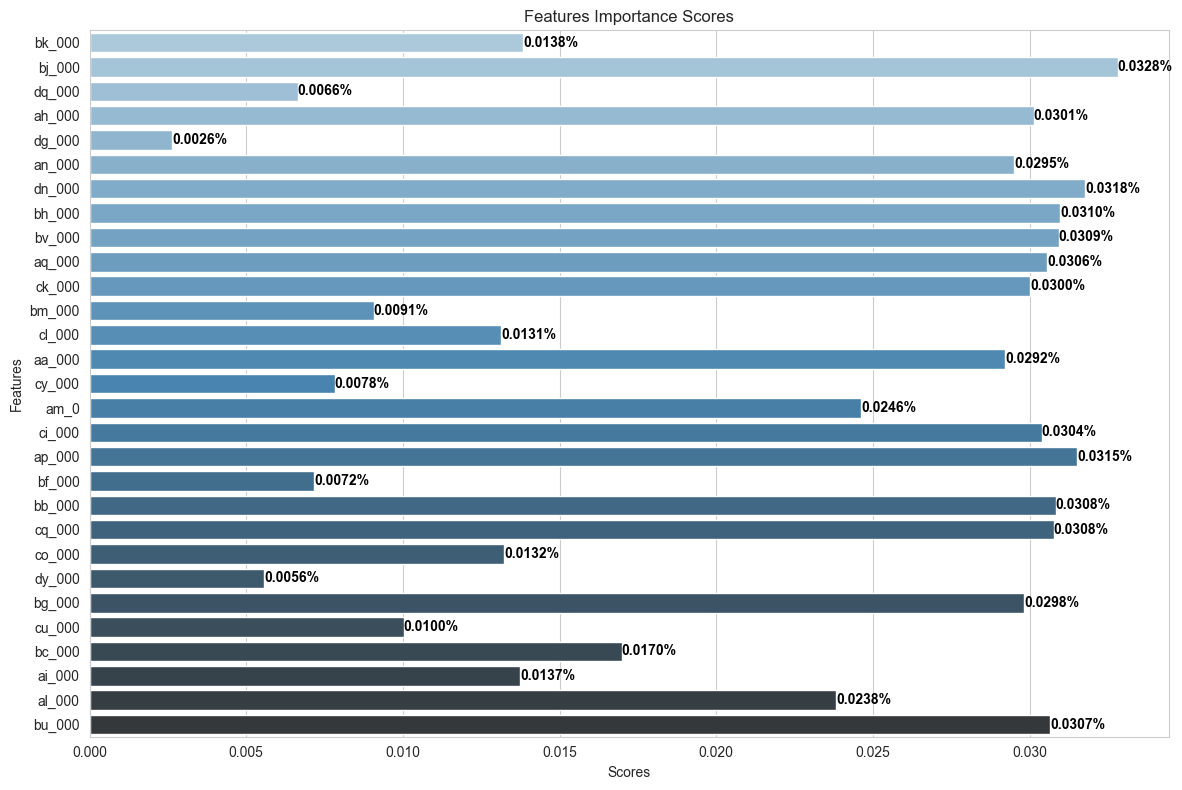

In [28]:
# Call the function
no_bin_selected_features_df = select_top_k_features(data=x_without_hist, y=y_train, n_selection=15)
no_bin_selected_features = no_bin_selected_features_df.index.tolist()



Feature: bk_000
Class 0 - Mean: 280193.76, Std Dev: 215784.55
Class 1 - Mean: 359053.89, Std Dev: 160967.14


2025-02-04 17:27:53,076 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:27:53,178 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


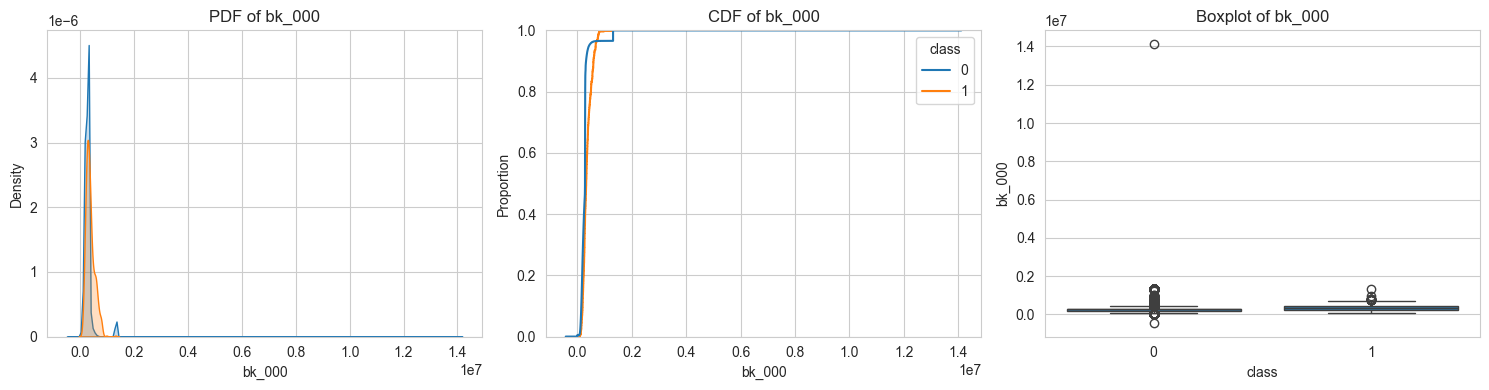


Feature: bj_000
Class 0 - Mean: 270714.89, Std Dev: 505443.49
Class 1 - Mean: 3044772.36, Std Dev: 1057304.01


2025-02-04 17:27:56,507 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:27:56,625 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


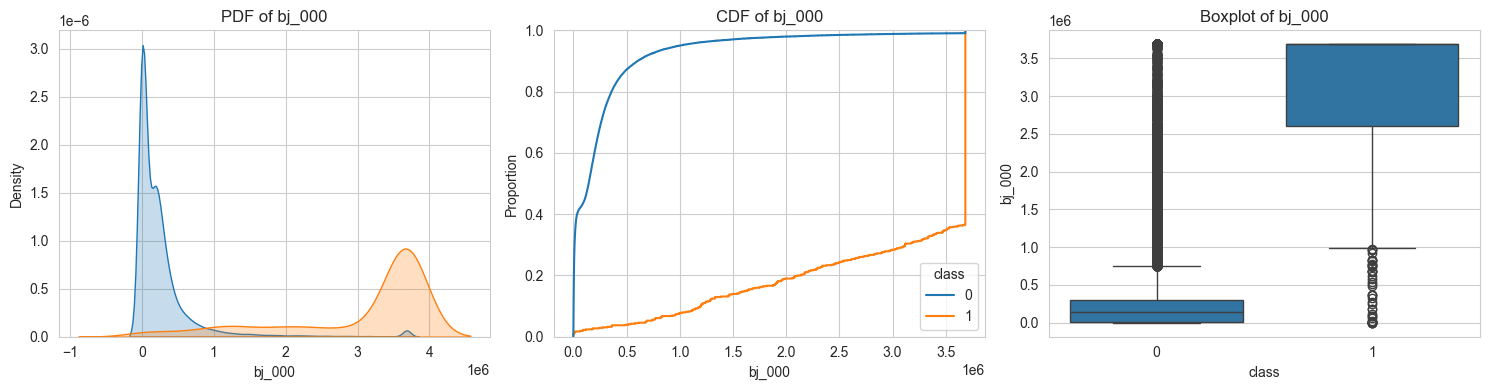


Feature: dq_000
Class 0 - Mean: 1437893.23, Std Dev: 12353714.19
Class 1 - Mean: 27021115.92, Std Dev: 67074364.25


2025-02-04 17:28:00,429 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:28:00,533 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


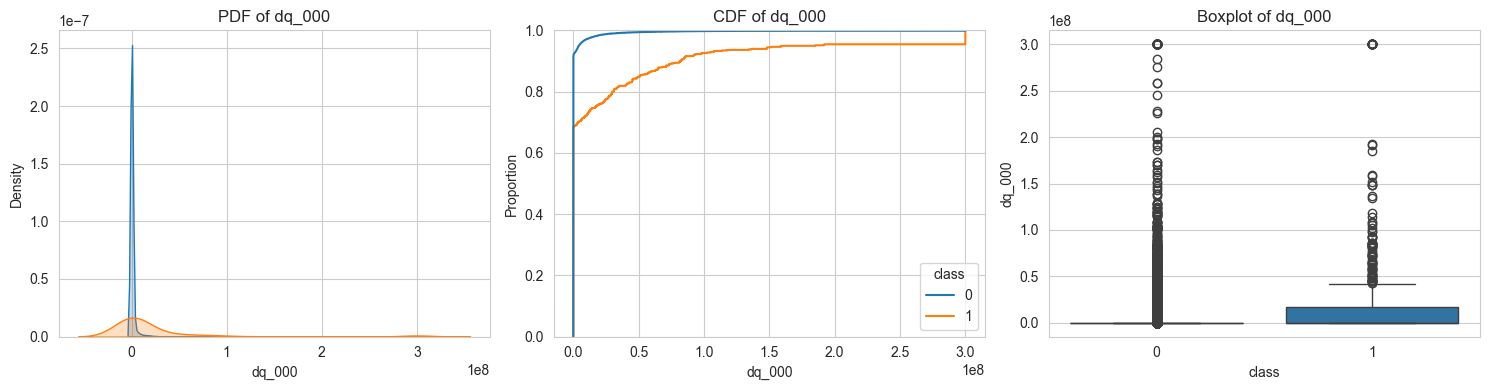


Feature: ah_000
Class 0 - Mean: 1239460.27, Std Dev: 1925272.41
Class 1 - Mean: 9811308.73, Std Dev: 3235865.33


2025-02-04 17:28:04,664 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:28:04,761 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


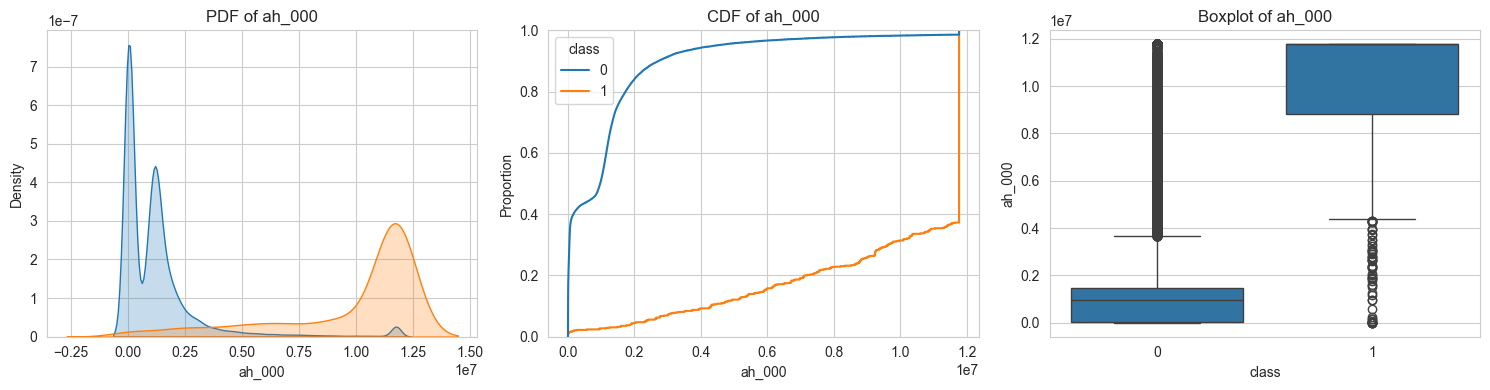


Feature: dg_000
Class 0 - Mean: 879.83, Std Dev: 14186.73
Class 1 - Mean: 44458.95, Std Dev: 144313.9


2025-02-04 17:28:07,317 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:28:07,412 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


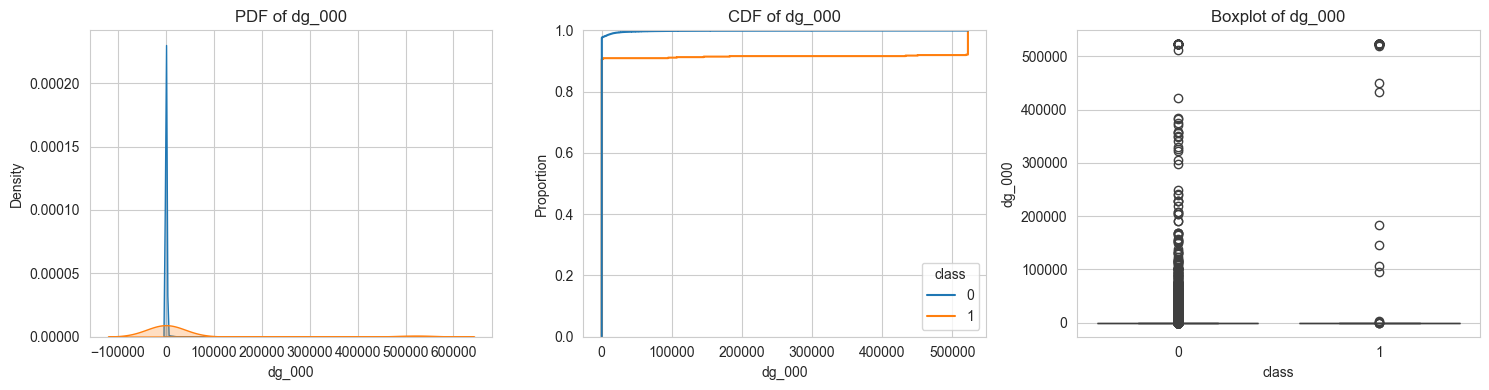


Feature: an_000
Class 0 - Mean: 2379350.86, Std Dev: 3529337.84
Class 1 - Mean: 17582132.01, Std Dev: 5799714.56


2025-02-04 17:28:11,045 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:28:11,160 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


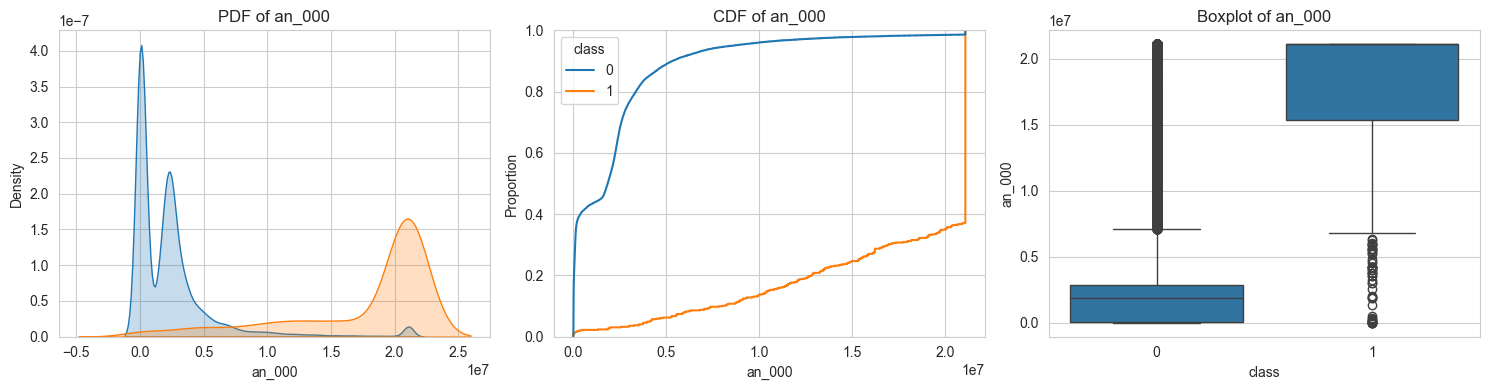


Feature: dn_000
Class 0 - Mean: 21368.72, Std Dev: 36637.96
Class 1 - Mean: 205633.87, Std Dev: 71920.76


2025-02-04 17:28:14,891 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:28:15,006 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


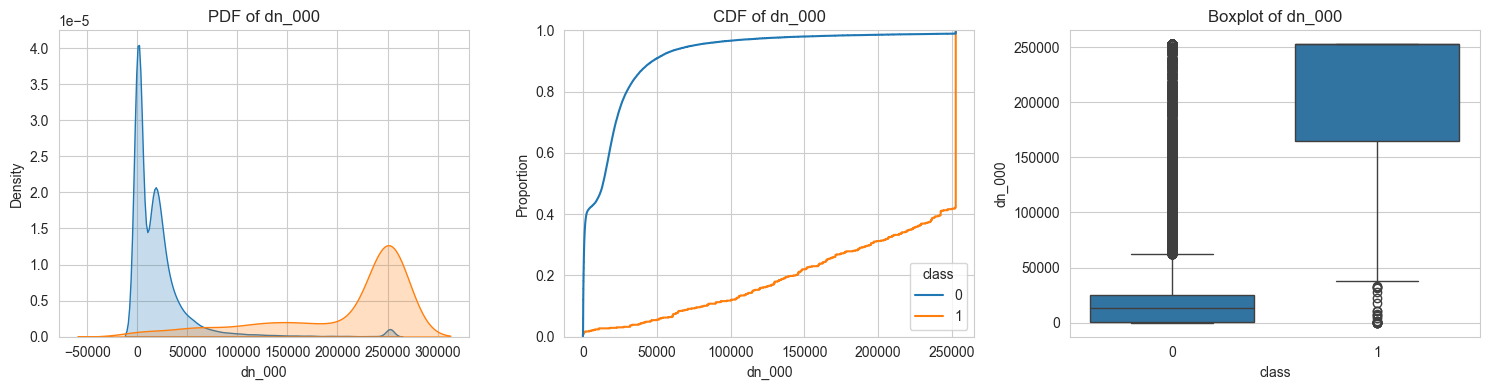


Feature: bh_000
Class 0 - Mean: 37258.93, Std Dev: 61083.94
Class 1 - Mean: 323444.13, Std Dev: 110319.87


2025-02-04 17:28:19,061 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:28:19,195 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


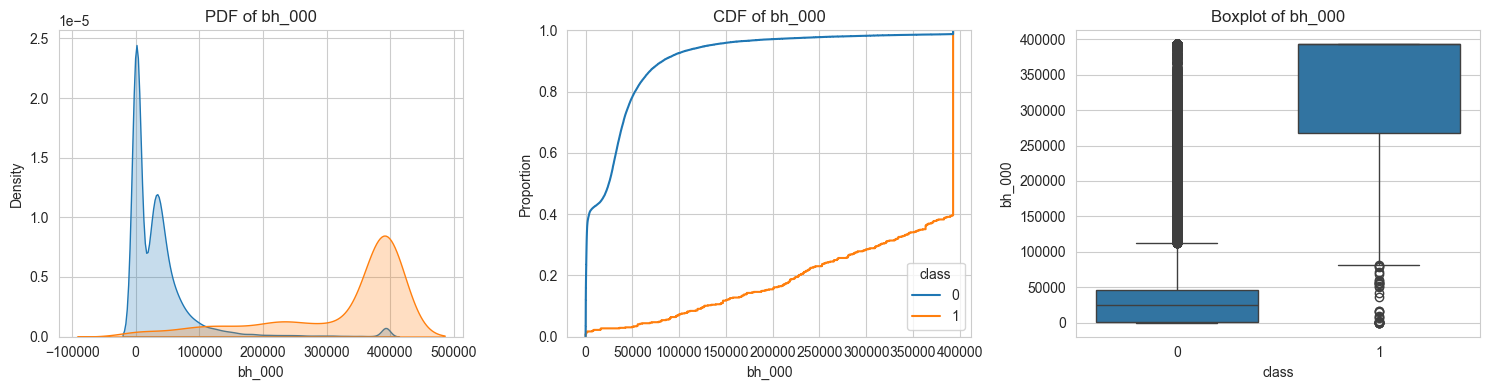


Feature: bv_000
Class 0 - Mean: 2980716.44, Std Dev: 4552883.35
Class 1 - Mean: 23797969.62, Std Dev: 7598994.72


2025-02-04 17:28:24,814 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:28:24,948 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


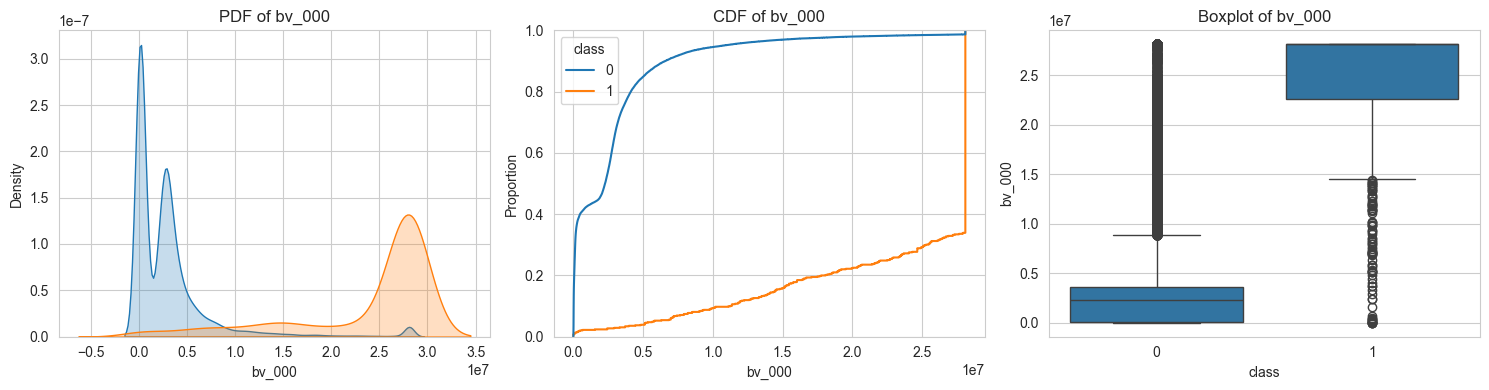


Feature: aq_000
Class 0 - Mean: 278003.28, Std Dev: 457432.7
Class 1 - Mean: 2501076.83, Std Dev: 885920.91


2025-02-04 17:28:30,570 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:28:30,728 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


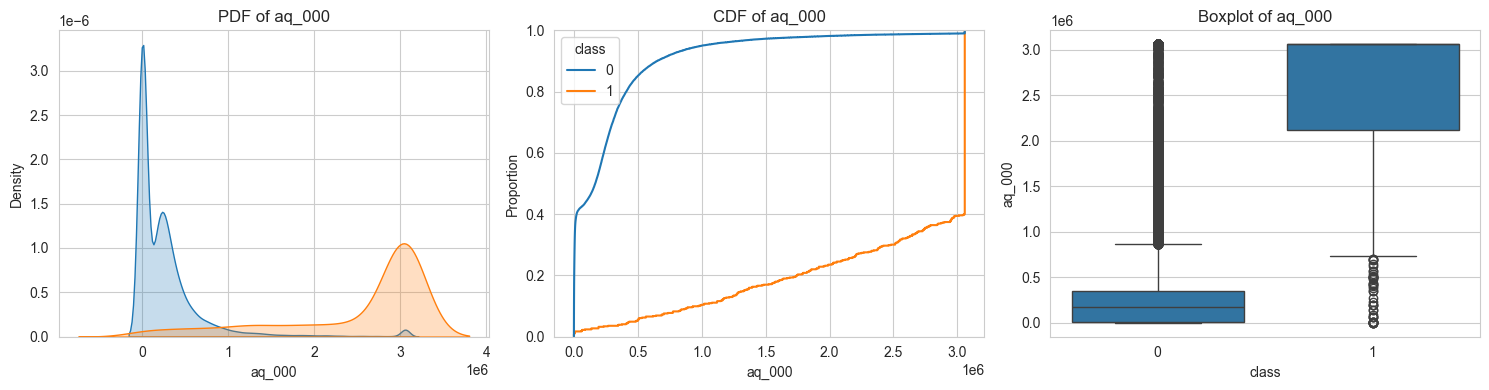


Feature: ck_000
Class 0 - Mean: 432790.04, Std Dev: 753679.3
Class 1 - Mean: 4012856.6, Std Dev: 1420806.78


2025-02-04 17:28:35,076 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:28:35,235 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


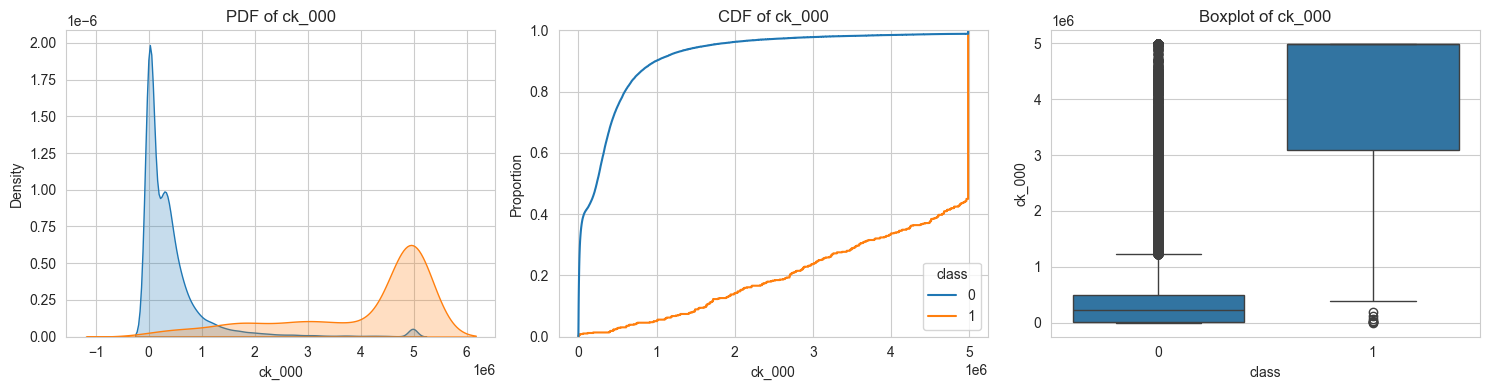


Feature: bm_000
Class 0 - Mean: 369957.54, Std Dev: 442932.31
Class 1 - Mean: 330235.95, Std Dev: 144541.28


2025-02-04 17:28:38,081 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:28:38,188 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


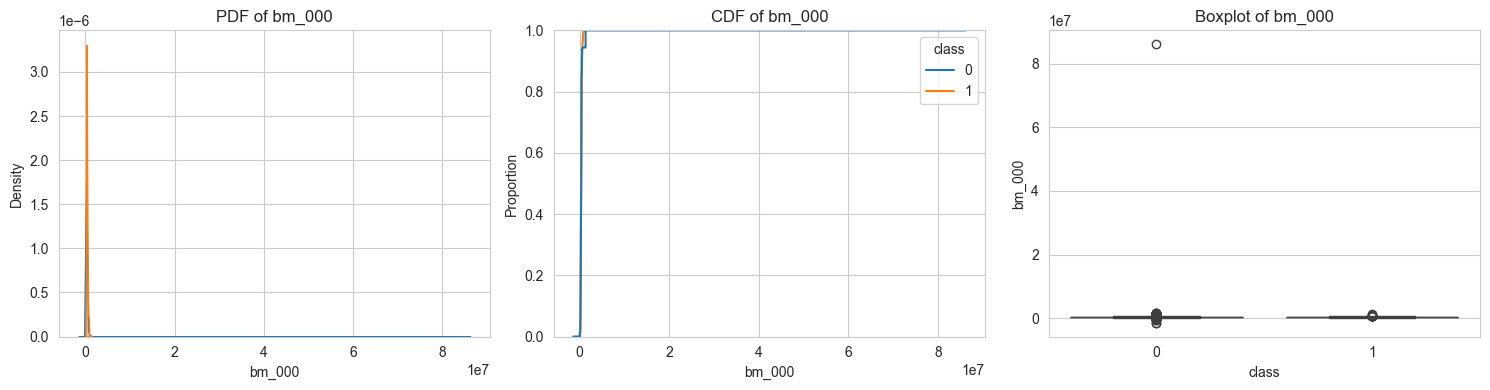


Feature: cl_000
Class 0 - Mean: 114.26, Std Dev: 725.89
Class 1 - Mean: 1460.21, Std Dev: 2768.6


2025-02-04 17:28:40,890 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:28:41,260 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


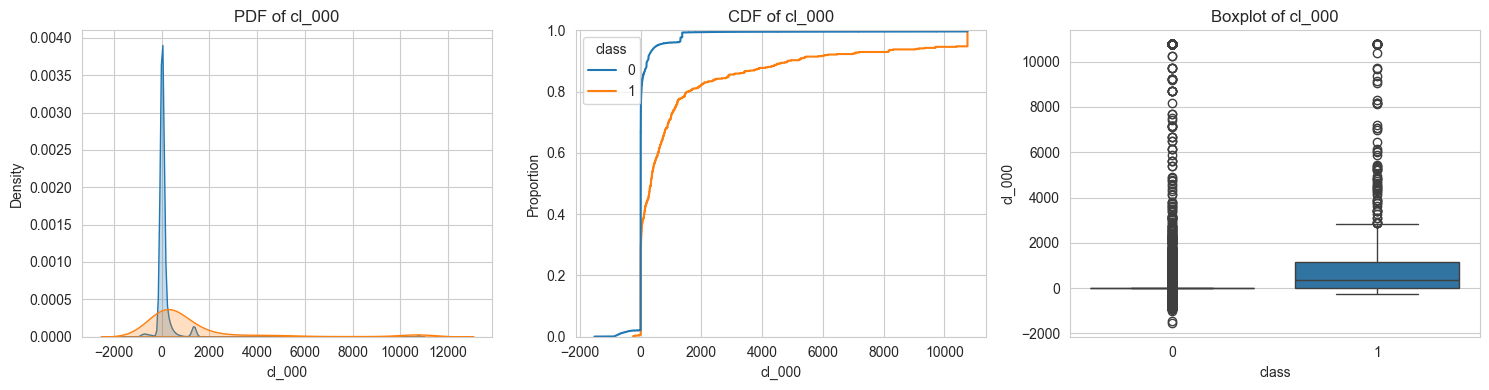


Feature: aa_000
Class 0 - Mean: 38796.83, Std Dev: 59743.63
Class 1 - Mean: 297821.65, Std Dev: 103995.3


2025-02-04 17:28:45,540 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:28:46,009 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


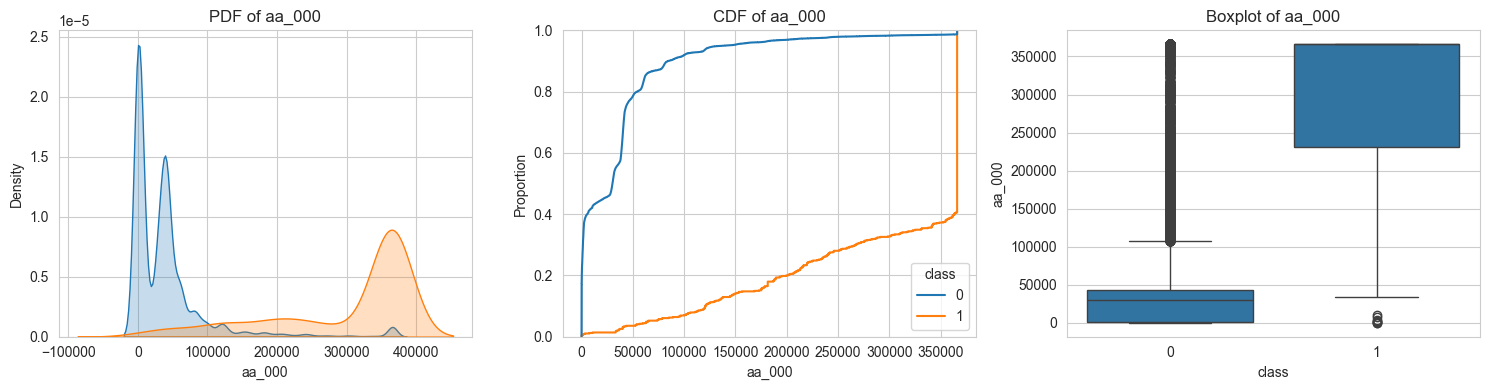


Feature: cy_000
Class 0 - Mean: 91.3, Std Dev: 1473.84
Class 1 - Mean: 1642.14, Std Dev: 6072.85


2025-02-04 17:28:50,023 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:28:50,304 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


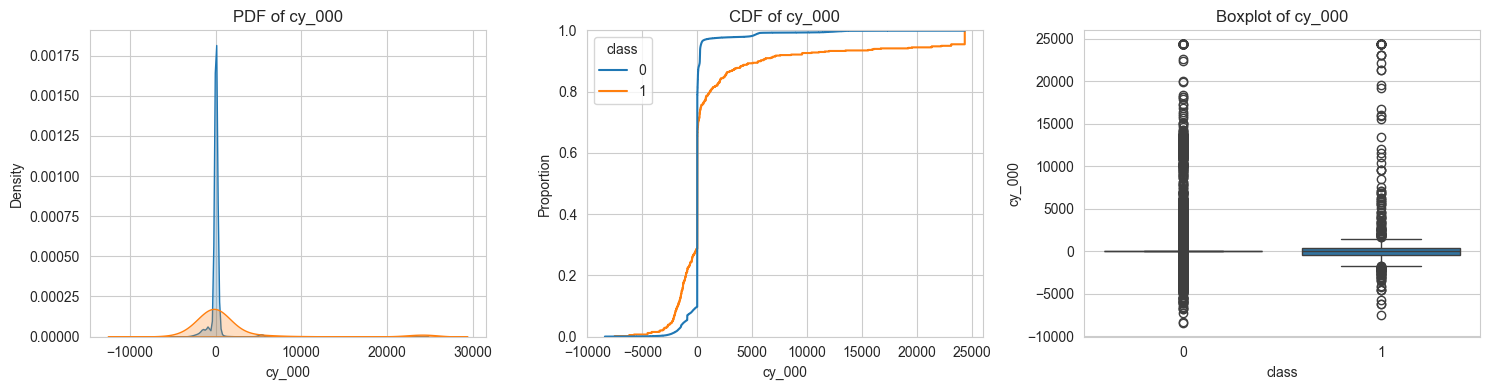


Feature: am_0
Class 0 - Mean: 27102.18, Std Dev: 147380.64
Class 1 - Mean: 862145.26, Std Dev: 727374.31


2025-02-04 17:28:53,122 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:28:53,221 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


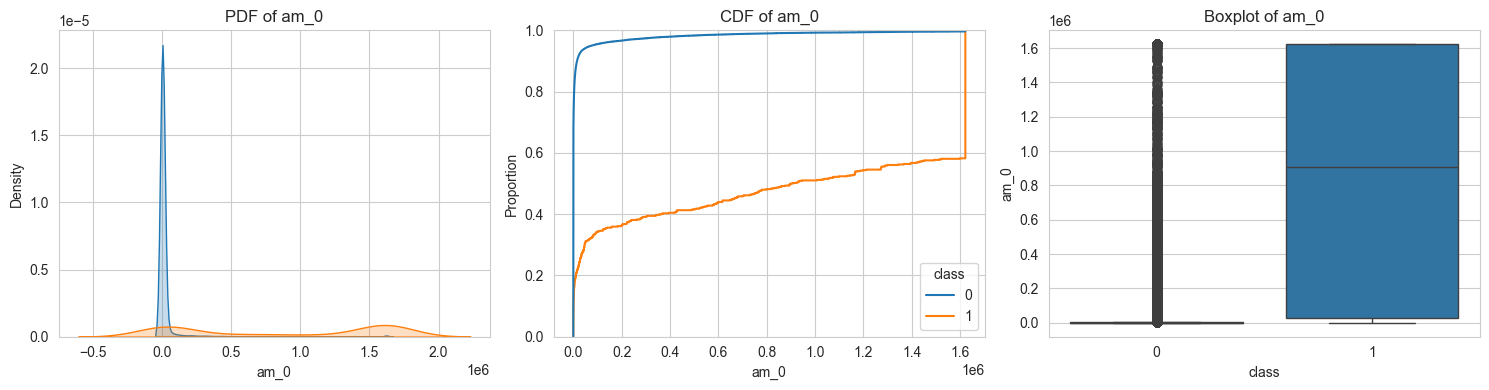


Feature: ci_000
Class 0 - Mean: 2274906.55, Std Dev: 3445648.11
Class 1 - Mean: 17469096.64, Std Dev: 5608083.73


2025-02-04 17:28:57,188 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:28:57,306 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


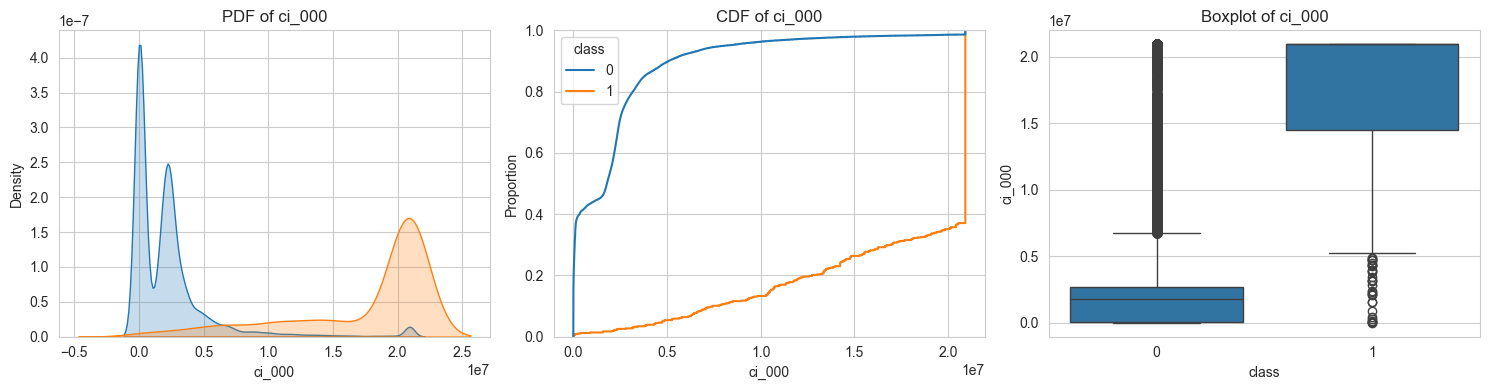


Feature: ap_000
Class 0 - Mean: 578980.3, Std Dev: 1021849.13
Class 1 - Mean: 5737678.6, Std Dev: 2046578.92


2025-02-04 17:29:00,904 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:29:01,005 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


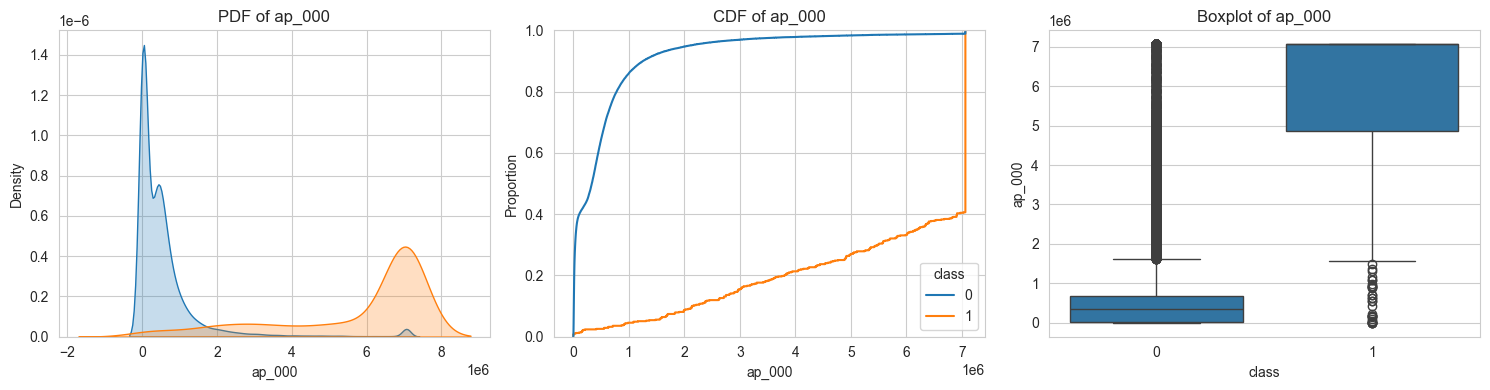


Feature: bf_000
Class 0 - Mean: 50.1, Std Dev: 192.43
Class 1 - Mean: 436.62, Std Dev: 631.65


2025-02-04 17:29:04,084 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:29:04,454 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


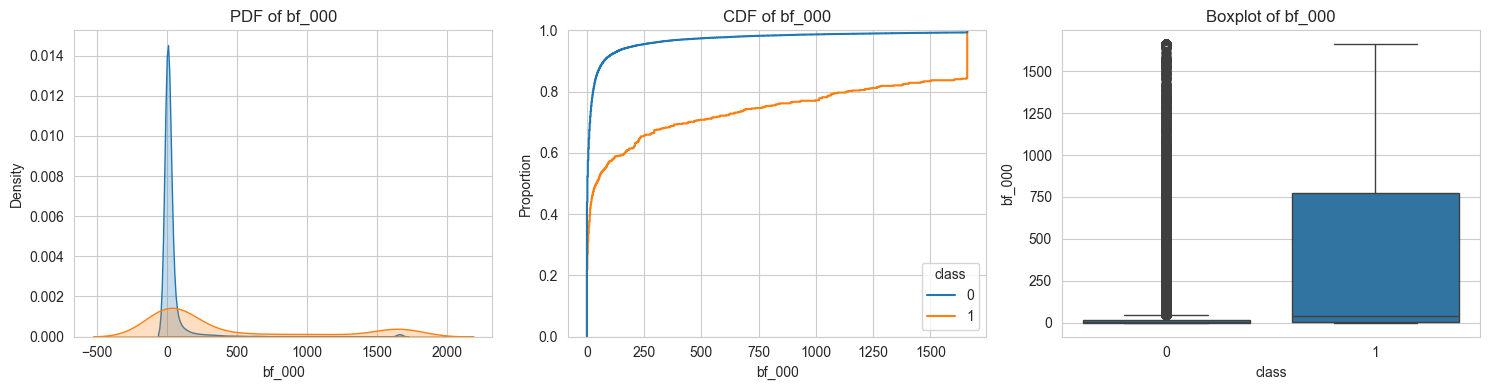


Feature: bb_000
Class 0 - Mean: 2980716.5, Std Dev: 4552883.43
Class 1 - Mean: 23797969.96, Std Dev: 7598994.92


2025-02-04 17:29:08,287 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:29:08,400 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


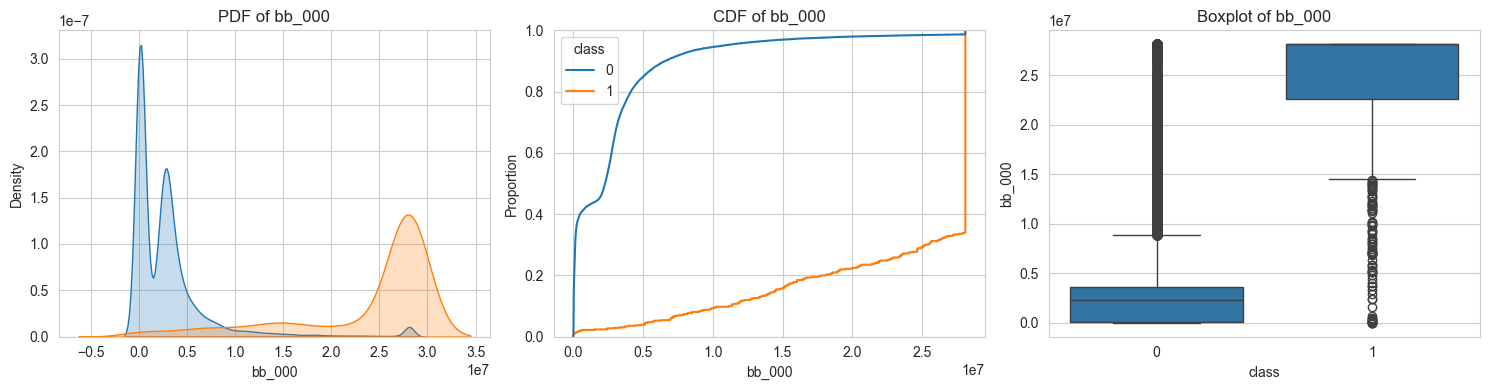


Feature: cq_000
Class 0 - Mean: 2980716.4, Std Dev: 4552883.25
Class 1 - Mean: 23797968.31, Std Dev: 7598994.2


2025-02-04 17:29:11,935 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:29:12,039 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


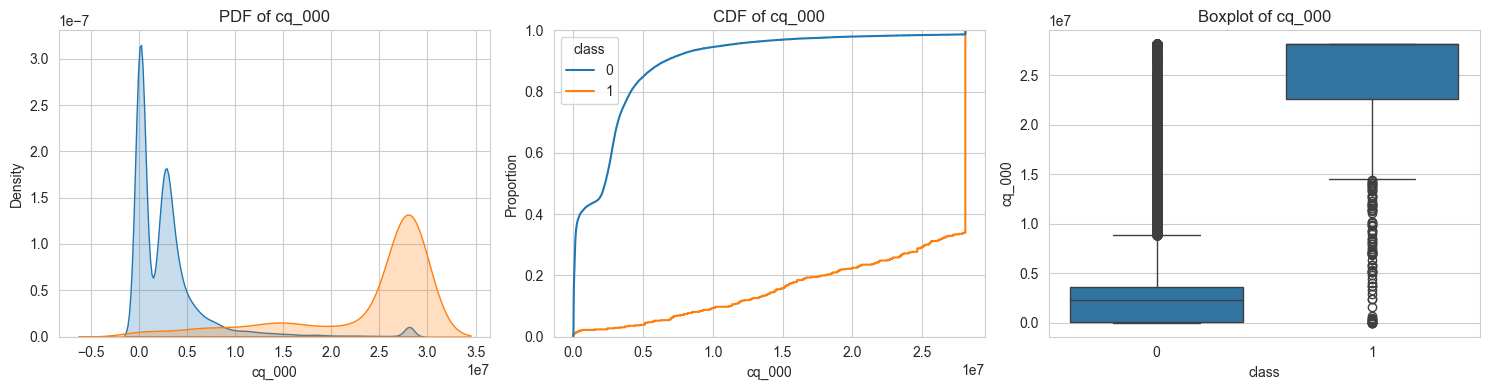


Feature: co_000
Class 0 - Mean: 42694.1, Std Dev: 470206.17
Class 1 - Mean: 106749.14, Std Dev: 98332.15


2025-02-04 17:29:14,654 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:29:14,770 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


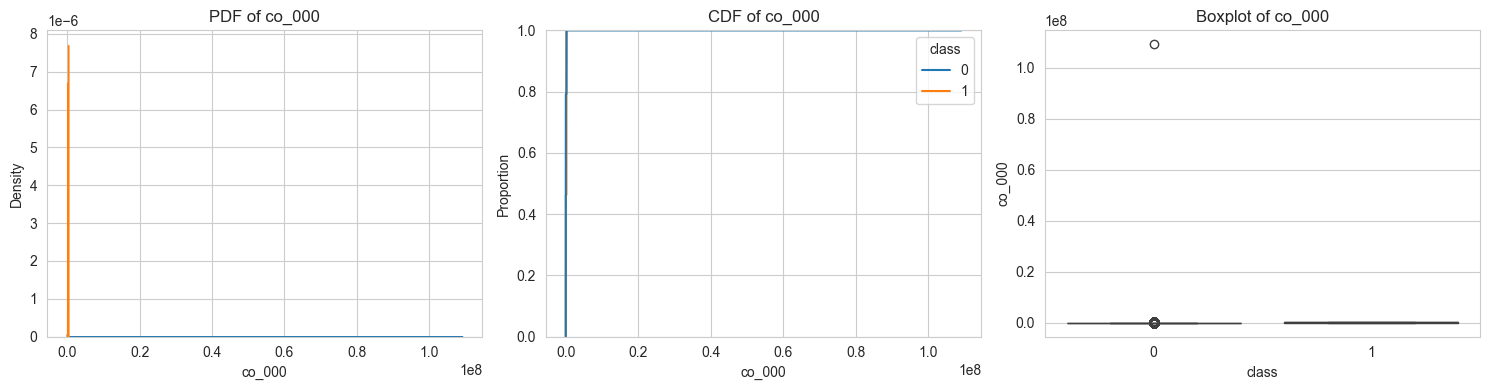


Feature: dy_000
Class 0 - Mean: 4764.13, Std Dev: 21695.13
Class 1 - Mean: 36836.22, Std Dev: 63775.88


2025-02-04 17:29:18,088 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:29:18,370 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


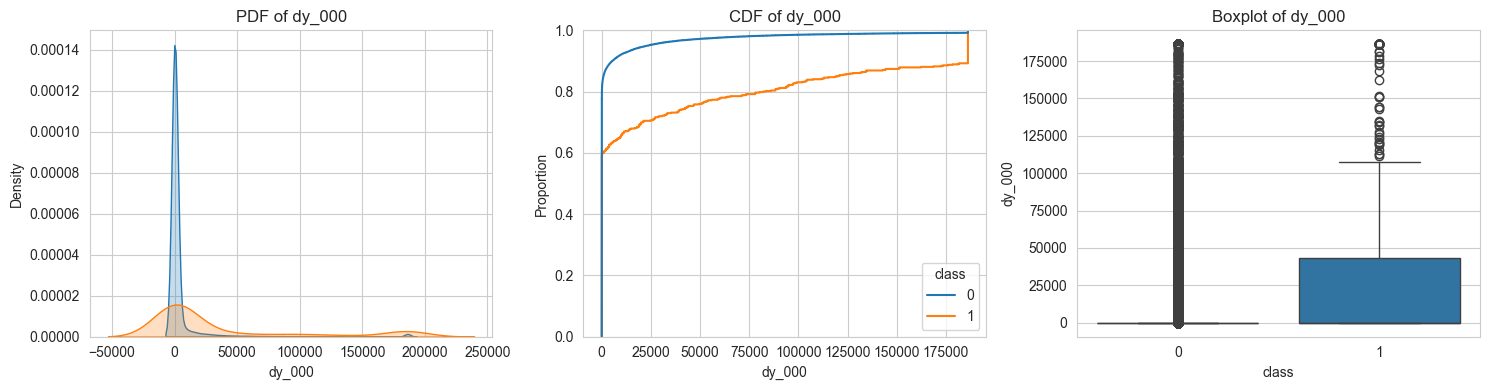


Feature: bg_000
Class 0 - Mean: 1239460.27, Std Dev: 1925272.36
Class 1 - Mean: 9811308.67, Std Dev: 3235865.3


2025-02-04 17:29:22,169 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:29:22,281 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


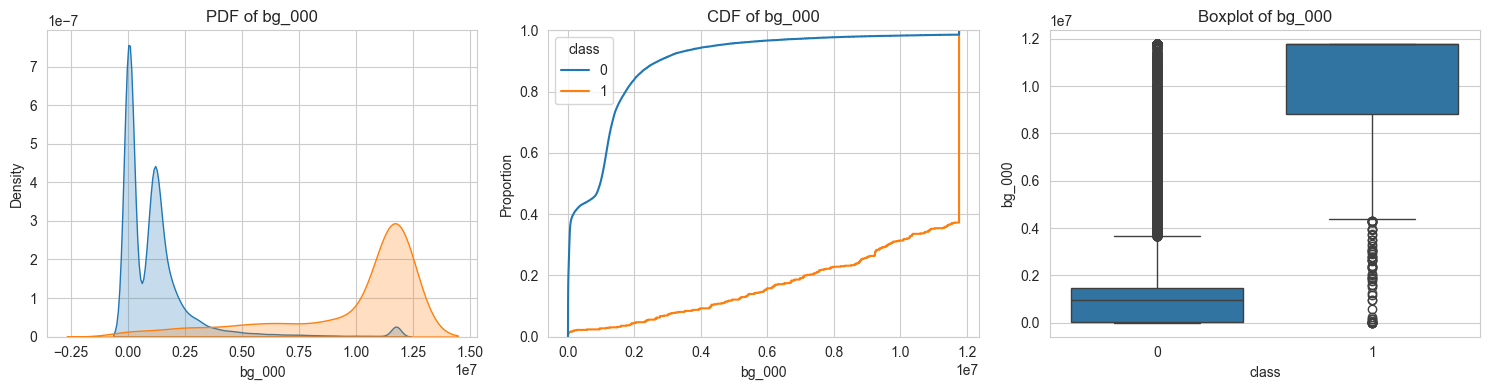


Feature: cu_000
Class 0 - Mean: 984.75, Std Dev: 1983.55
Class 1 - Mean: 2276.49, Std Dev: 6219.14


2025-02-04 17:29:25,454 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:29:25,904 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


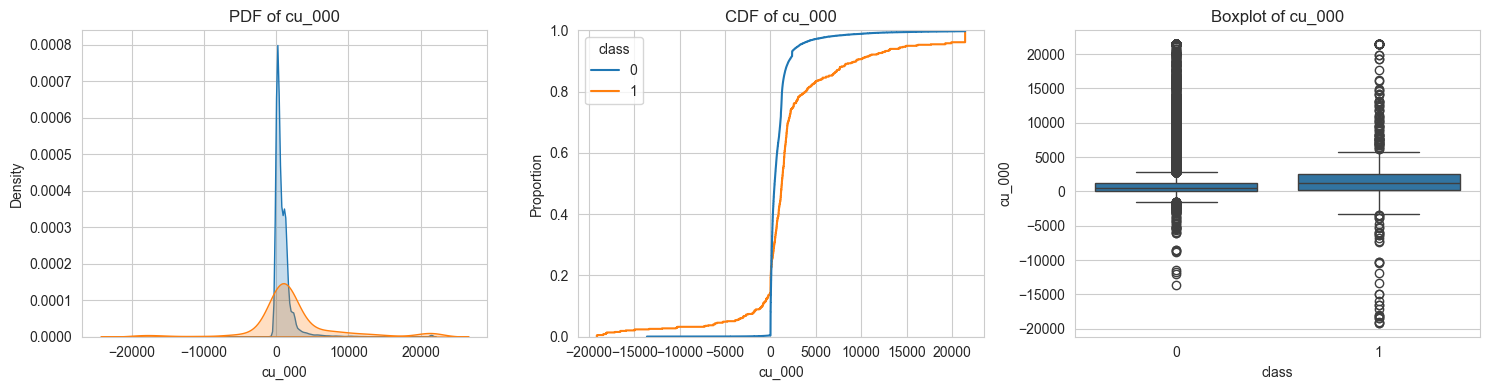


Feature: bc_000
Class 0 - Mean: 384.2, Std Dev: 1454.41
Class 1 - Mean: 4848.95, Std Dev: 4861.66


2025-02-04 17:29:29,340 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:29:29,452 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


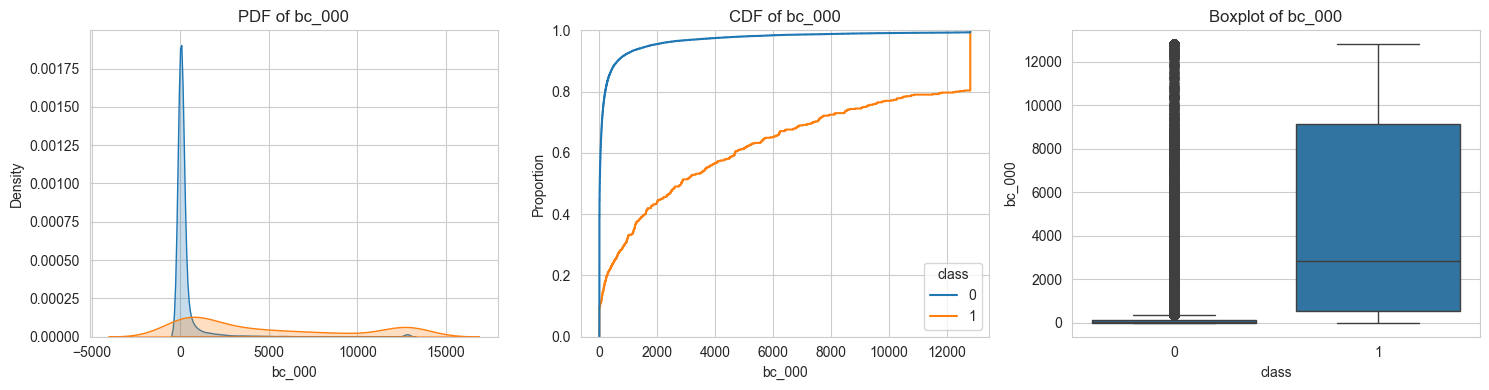


Feature: ai_000
Class 0 - Mean: 2688.69, Std Dev: 23139.55
Class 1 - Mean: 49591.88, Std Dev: 102124.02


2025-02-04 17:29:32,604 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:29:32,756 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


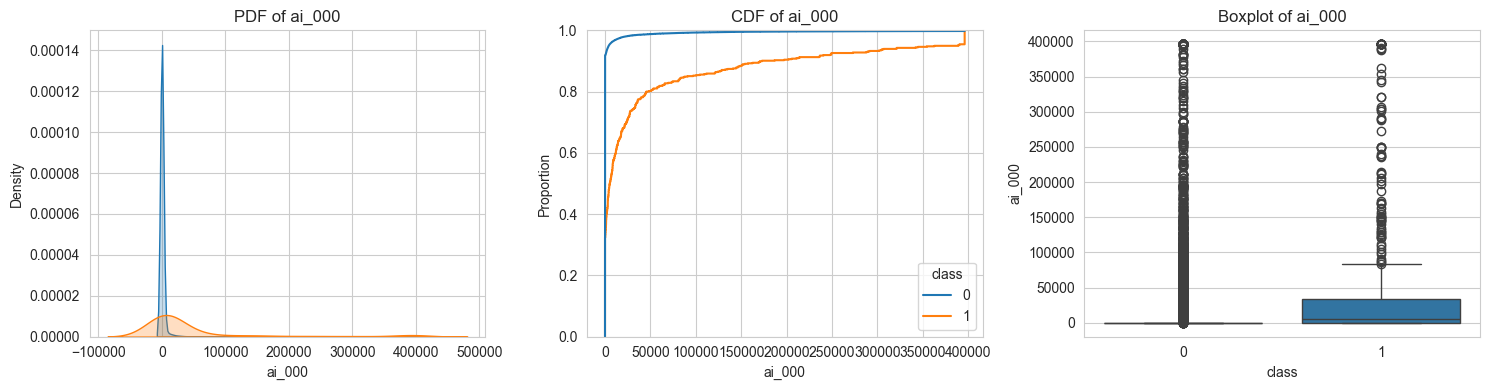


Feature: al_000
Class 0 - Mean: 18102.8, Std Dev: 99852.08
Class 1 - Mean: 566025.24, Std Dev: 487772.51


2025-02-04 17:29:35,969 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:29:36,221 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


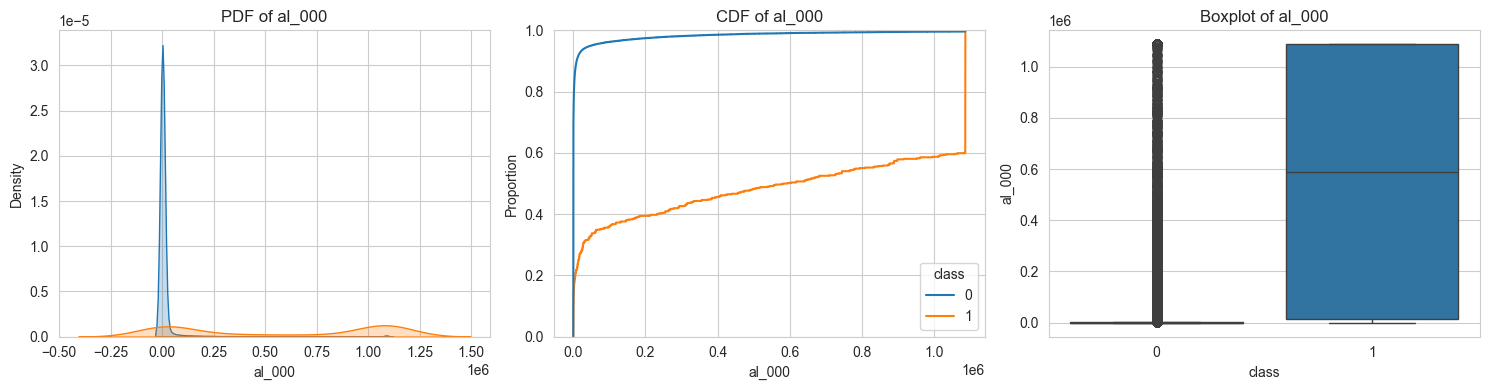


Feature: bu_000
Class 0 - Mean: 2980716.11, Std Dev: 4552883.09
Class 1 - Mean: 23797967.12, Std Dev: 7598993.61


2025-02-04 17:29:41,237 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:29:41,365 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


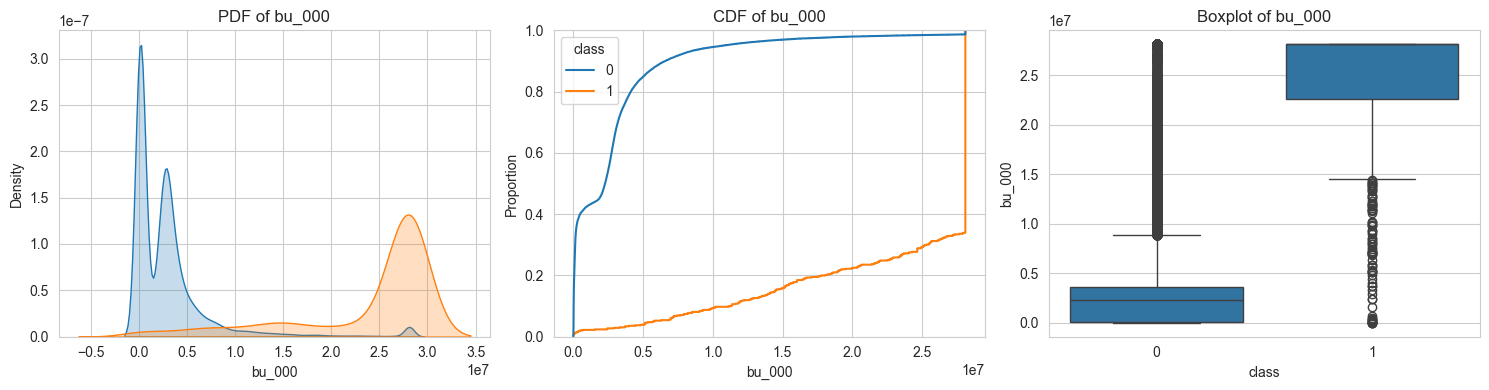

In [29]:
# Perform univariate analysis on selected features
univariate_analysis(train_data_cleaned[no_bin_selected_features + ['class']], 'class')

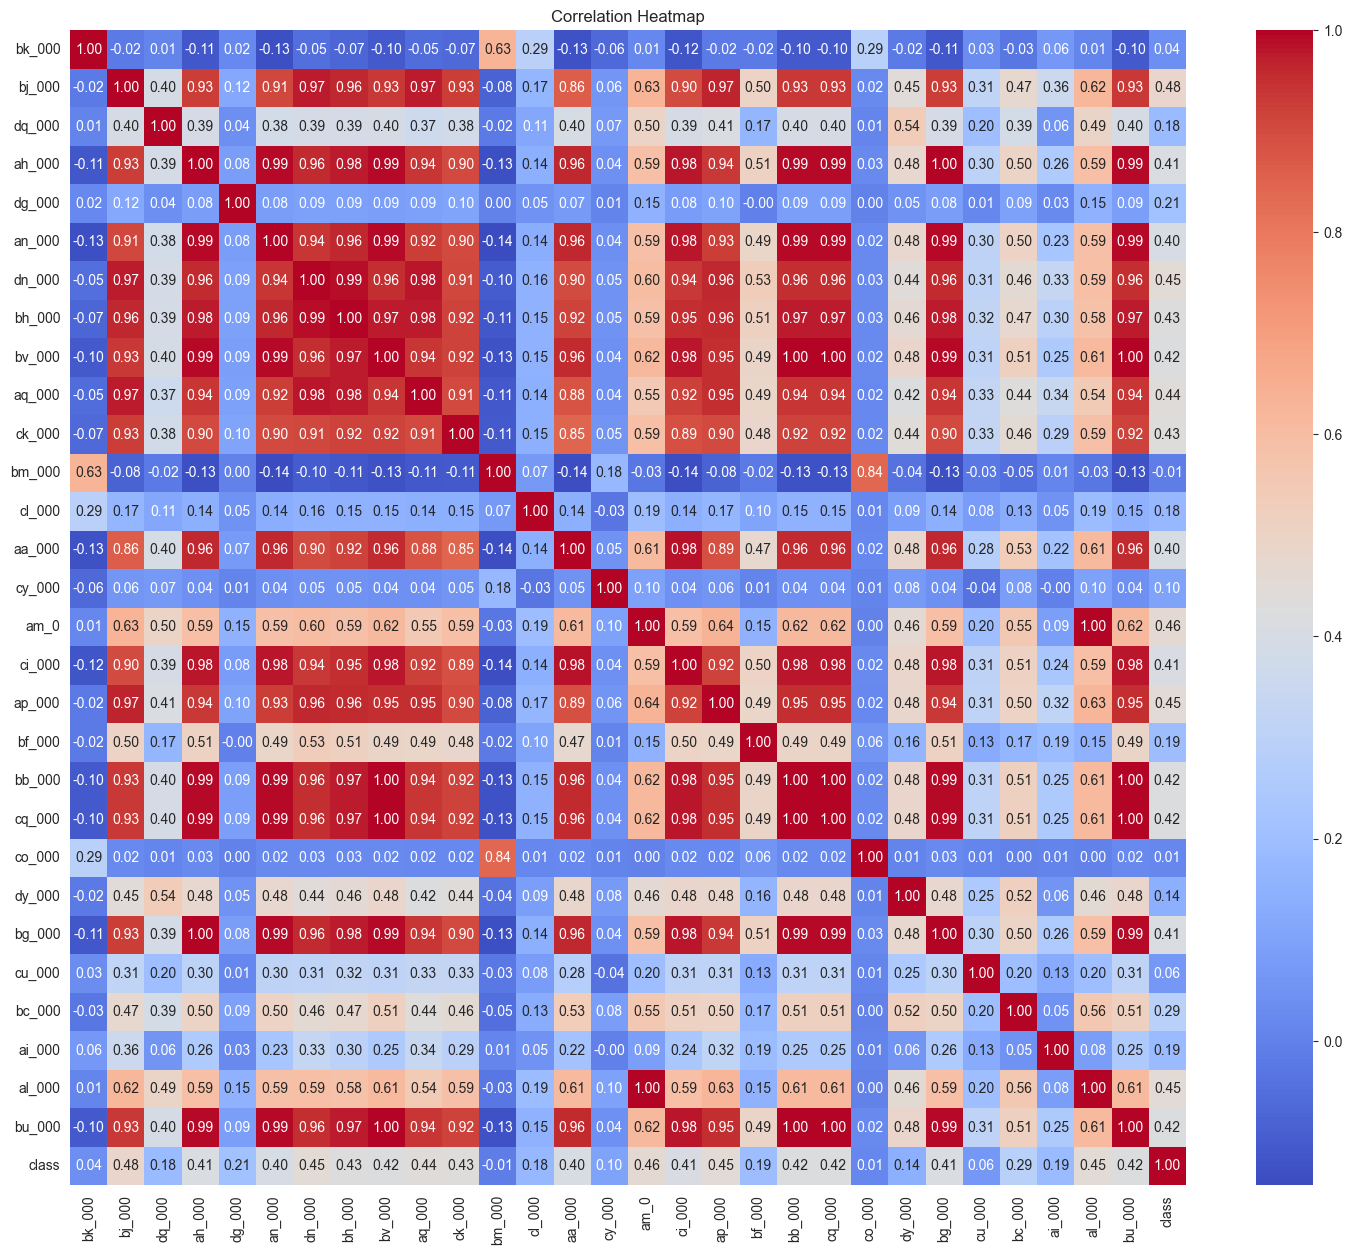

2025-02-04 17:29:48,150 - INFO - Top 5 uncorrelated features:
bm_000   -0.009251
co_000    0.014057
bk_000    0.037585
cu_000    0.063798
cy_000    0.099388
Name: class, dtype: float64
2025-02-04 17:29:48,150 - INFO - The most uncorrelated feature is: bm_000


In [30]:
no_bin_selected_features_df = train_data_cleaned[no_bin_selected_features+['class']]
no_bin_top_uncorrelated_features = correlation_matrix(data=no_bin_selected_features_df)

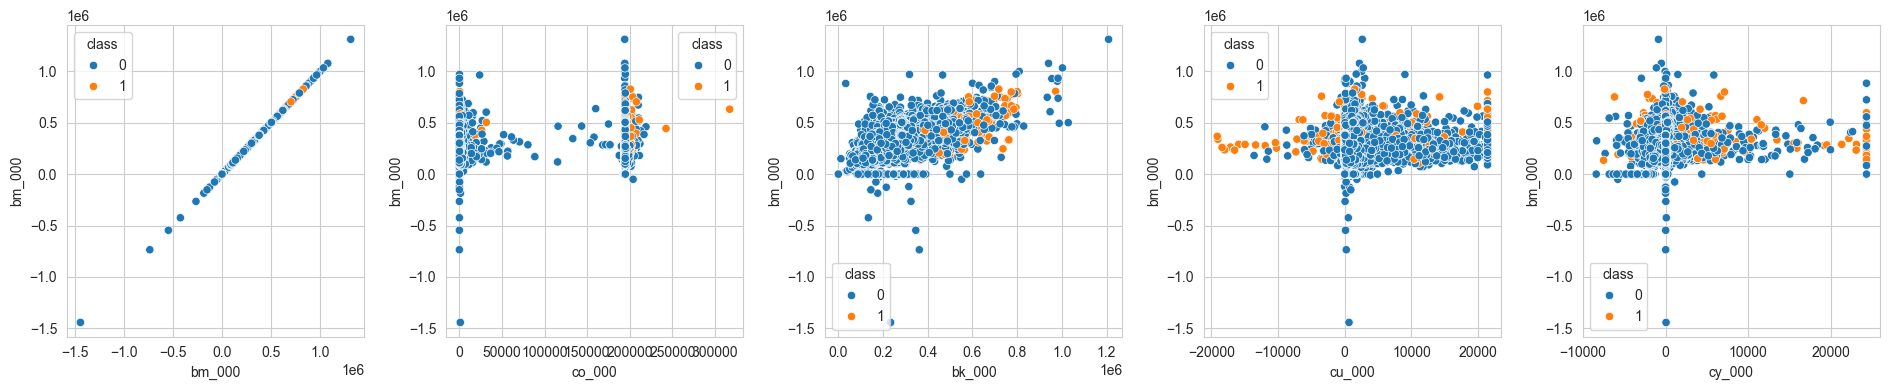

In [31]:
no_bin_top_uncorr_df = no_bin_selected_features_df[no_bin_top_uncorrelated_features + ['class']]
scatter_plot(data=no_bin_top_uncorr_df, feature=no_bin_top_uncorrelated_features[0], percentile=95)

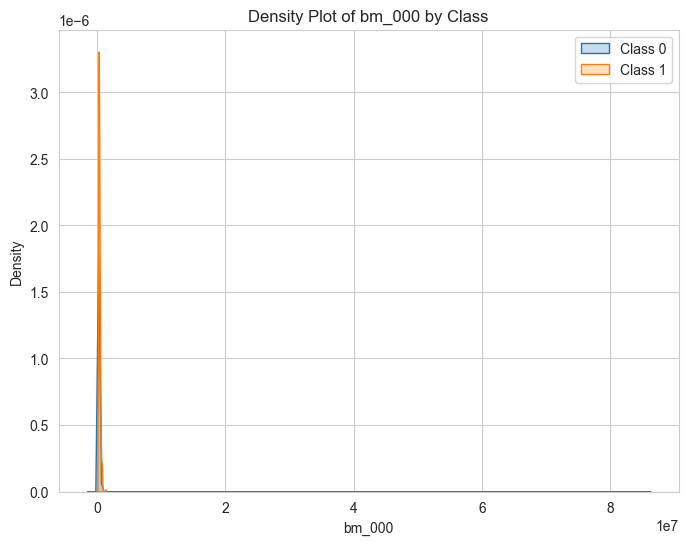

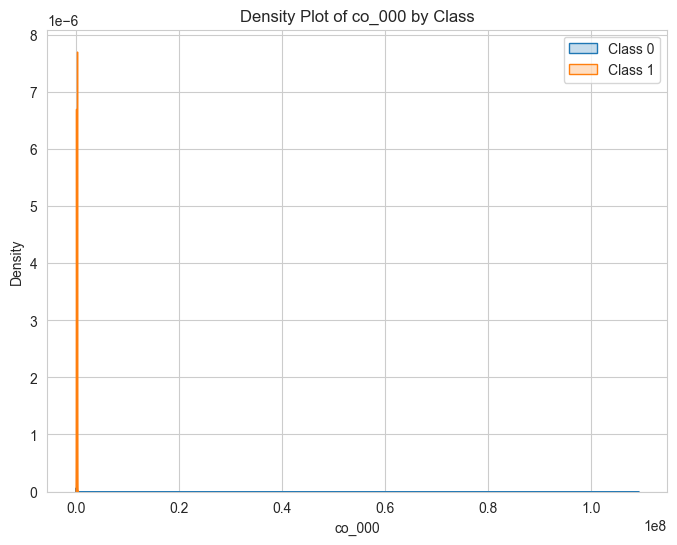

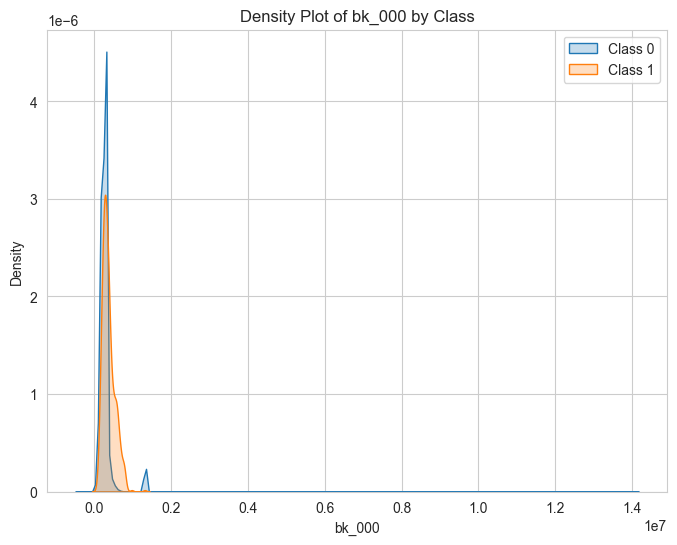

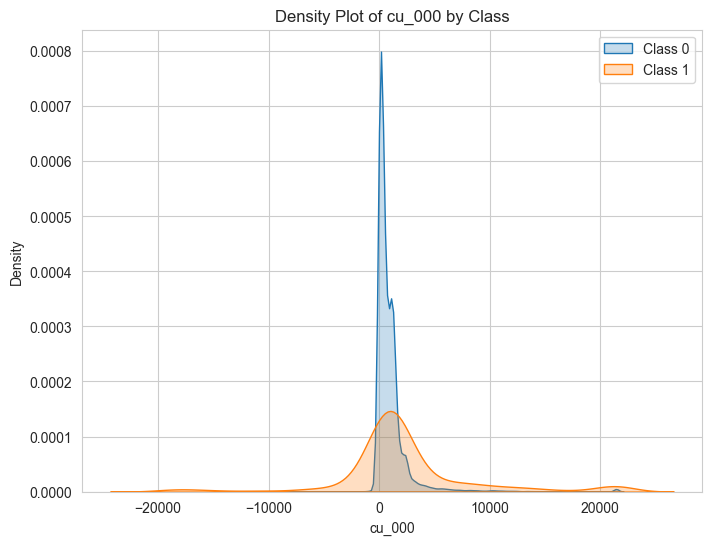

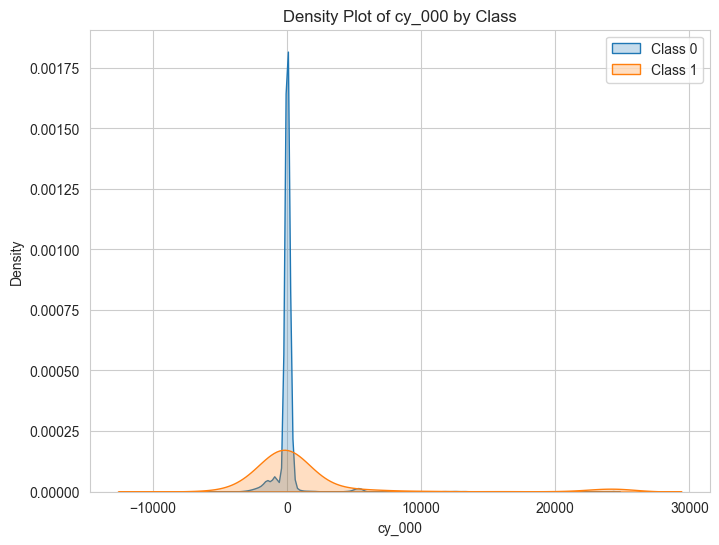

In [32]:
visualize_class_distributions(train_data_cleaned[no_bin_top_uncorrelated_features + ['class']], no_bin_top_uncorrelated_features)

In [33]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

def balance_classes(df, label, over_strategy=0.3, under_strategy=0.5):
    """
    Balances the class distribution in the dataset using SMOTE and Random Under-Sampling.

    Parameters:
    - df (pd.DataFrame): The feature DataFrame.
    - label (pd.Series): The target labels.
    - over_strategy (float): The desired ratio of the minority class after SMOTE.
    - under_strategy (float): The desired ratio of the majority class after under-sampling.

    Returns:
    - pd.DataFrame: The balanced feature DataFrame.
    - pd.Series: The balanced target labels.
    """
    
    # Define the over-sampling and under-sampling strategies
    over = SMOTE(sampling_strategy=over_strategy)
    under = RandomUnderSampler(sampling_strategy=under_strategy)

    # Create a pipeline with the defined steps
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)  # Use imblearn's Pipeline

    # Fit and resample the data
    df_balanced, label_balanced = pipeline.fit_resample(df, label)

    return df_balanced, label_balanced

# Convert the target column ('class') to binary (0 for 'neg', 1 for 'pos')
test_data_cleaned['class'] = test_data_cleaned['class'].map({'neg':0, 'pos':1})

# Separate features and target variable
X_train_balanced, y_train_balanced = balance_classes(train_data_cleaned.drop(columns=['class']), 
                                                     train_data_cleaned['class'])

# Assuming you have your DataFrame `test_cleaned_data` and target `y_test`
X_test_balanced, y_test_balanced = balance_classes(test_data_cleaned.drop(columns=['class']), 
                                                   test_data_cleaned['class'])

In [34]:
print(f"X_train_balanced Shape: {X_train_balanced.shape}")
print(f"X_test_balanced Shape: {X_test_balanced.shape}")
y_train_balanced.value_counts() 

X_train_balanced Shape: (49806, 162)
X_test_balanced Shape: (13200, 162)


class
0    33204
1    16602
Name: count, dtype: int64

2025-02-04 17:30:27,677 - INFO - Training X Set: (49806, 2), Y set: (49806,)


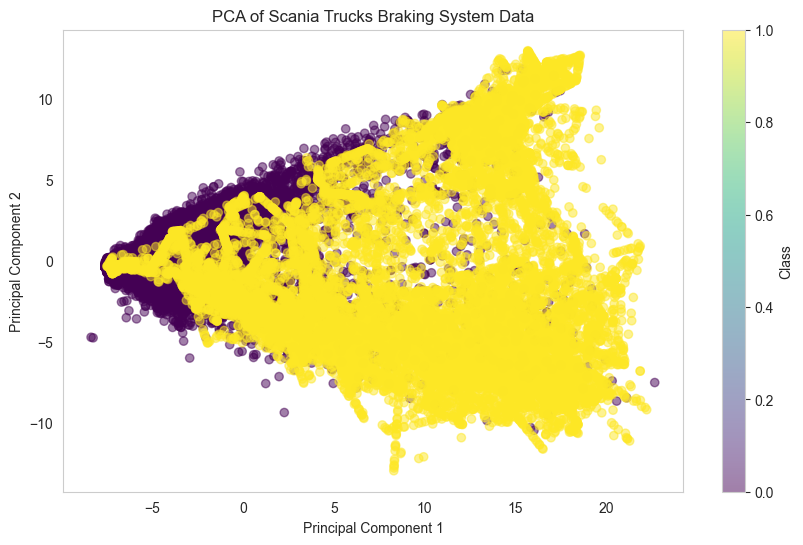

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline 

# Create a pipeline with StandardScaler and PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the data
    ('pca', PCA(n_components=2))   # Step 2: Apply PCA to reduce to 2 components
])

# Fit the pipeline on the training data and transform it
X_train_pca = pipeline.fit_transform(X_train_balanced)
logger.info(f"Training X Set: {X_train_pca.shape}, Y set: {y_train_balanced.shape}")
# Transform the test data using the same pipeline (without fitting)
X_test_pca = pipeline.transform(X_test_balanced)

# Create a DataFrame for the PCA results for visualization
pca_df = pd.DataFrame(data=X_train_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Class'] = y_train_balanced.values  # Add the target variable for coloring

# Plotting the PCA results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], 
                      c=pca_df['Class'], alpha=0.5, cmap='viridis')

plt.title('PCA of Scania Trucks Braking System Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Class')
plt.grid()
plt.show()

In [36]:
import pandas as pd
from skopt import BayesSearchCV
from sklearn.model_selection import KFold

def hyper_parameter_tuning(model: Pipeline, X: pd.DataFrame, y: pd.Series, param_space: dict, 
                           n_iter: int = 50, cv: int = 5, verbose: int=10):
    """
    Perform Bayesian hyperparameter tuning for a given model using cross-validation.

    Parameters:
    - model (Pipeline): The machine learning pipeline model to tune.
    - X (pd.DataFrame): The feature DataFrame.
    - y (pd.Series): The target labels.
    - param_space (dict): The parameter space for tuning.
    - n_iter (int): Number of iterations for the search (default is 50).
    - cv (int): Number of cross-validation folds (default is 5).

    Returns:
    - best_params (dict): The best parameters found during tuning.
    - best_score (float): The best score achieved during tuning.
    """
    
    # Create a KFold object for cross-validation
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    # Initialize BayesSearchCV with the model and parameter space
    clf = BayesSearchCV(
        model,
        param_space,
        n_iter=n_iter,
        cv=kf,
        n_jobs=-1,  # Use all available cores
        random_state=42,
        verbose=verbose
    )

    # Fit the model to the data
    clf.fit(X, y)

    return clf.best_params_, clf.best_score_


In [37]:
from sklearn.metrics import ( accuracy_score, 
                             classification_report, 
                             confusion_matrix,
                             precision_recall_curve,
                             f1_score
                             )

def evaluate_model(model, params: Dict[str, Tuple[pd.DataFrame, pd.Series]], plot:bool=True, verbose:int=0):
    """
    Evaluates the model on multiple datasets provided in a dictionary.

    Parameters:
        params (dict): A dictionary where keys are dataset names (e.g., "Training", "Testing", "Validation")
                      and values are tuples of (X, y, y_pred).

    Returns:
        dict: A dictionary containing accuracy scores and classification reports for each dataset.
    """
    results = {}

    for dataset, (X, y) in params.items():
        # Get prediction
        y_pred = model.predict(X)
        # Evaluate accuracy and classification report
        accuracy = accuracy_score(y, y_pred)
        report = classification_report(y, y_pred)
        matrix = confusion_matrix(y, y_pred)
        f1_score_ = f1_score(y, y_pred, average='macro')
        recall = precision_recall_curve(y, y_pred)
        
        # Log results
        if verbose > 0:
            logger.info(f'{dataset} Accuracy: {accuracy:.2f} \n')
            logger.info(f"{dataset} Confusion matrix:\n{matrix}")
            logger.info(f'{dataset} Classification Report:\n{report}')

        if plot:
            group_names = ["TN", "FP", "FN", "TP"]
            group_counts = [f"{value}" for value in matrix.flatten()]
            labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
            labels = np.asarray(labels).reshape(2,2)

            sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
            plt.show()
        
        # Store results in dictionary
        results[f'{dataset}_accuracy'] = accuracy
        results[f'{dataset}_report'] = report
        results[f'{dataset}_matrix'] = matrix
        results[f'{dataset}_f1_score'] = f1_score_
        results[f'{dataset}_recall'] = recall

    return results

# Dictionary with datasets and predictions
data_dict = {
    "Training": (X_train_pca, y_train_balanced),
    "Testing": (X_test_pca, y_test_balanced), 
}


2025-02-04 17:30:34,618 - INFO - Training Accuracy: 0.67 

2025-02-04 17:30:34,625 - INFO - Training Confusion matrix:
[[33204     0]
 [16602     0]]
2025-02-04 17:30:34,627 - INFO - Training Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     33204
           1       0.00      0.00      0.00     16602

    accuracy                           0.67     49806
   macro avg       0.33      0.50      0.40     49806
weighted avg       0.44      0.67      0.53     49806



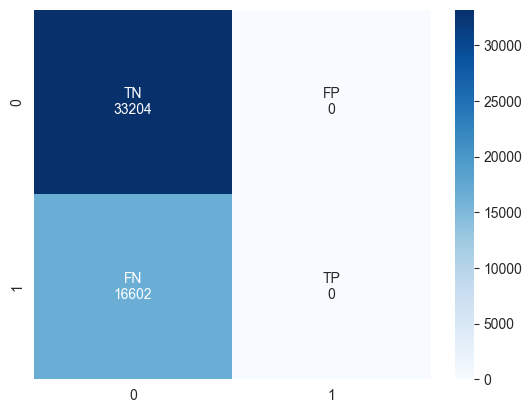

2025-02-04 17:30:35,131 - INFO - Testing Accuracy: 0.67 

2025-02-04 17:30:35,133 - INFO - Testing Confusion matrix:
[[8800    0]
 [4400    0]]
2025-02-04 17:30:35,133 - INFO - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      8800
           1       0.00      0.00      0.00      4400

    accuracy                           0.67     13200
   macro avg       0.33      0.50      0.40     13200
weighted avg       0.44      0.67      0.53     13200



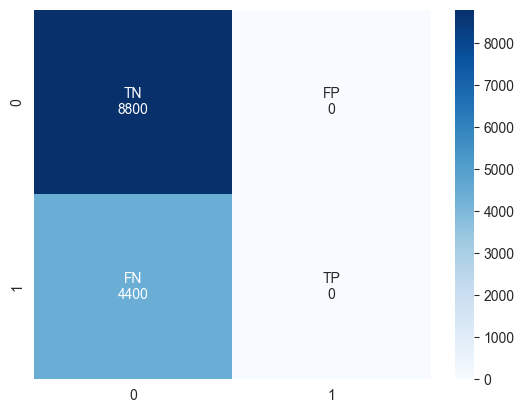

In [38]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy='most_frequent', constant=0)
dummy_model.fit(X_train_pca, y_train_balanced)

reports = evaluate_model(dummy_model, data_dict, verbose=1)


In [39]:
import joblib
from typing import Dict, Tuple, Optional, Callable, Any
import logging


def train_and_evaluate_model(model_func: Callable, 
                             datasets: Dict[str, Tuple[Optional[Any]]],
                             param_space: Dict[str, Tuple[Optional[int]]], 
                             filename: str) -> Tuple[Callable, dict]:
    """
    Train and evaluate a machine learning model, perform hyperparameter tuning if required, 
    and save the model if it performs well.

    Parameters:
    - model_func (Callable): Model constructor function (e.g., RandomForestClassifier).
    - param_space (Dict[str, Tuple[Optional[int]]]): Parameter space for hyperparameter tuning.
    - filename (str): Path to save or load the trained model.

    Returns:
    - model (Callable): The trained model.
    - report (dict): Evaluation report containing accuracy and other metrics.
    """
    try:
        # Ensure the directory exists before using the file
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        model = joblib.load(filename)
        logger.info("Loaded existing model from file.")
    except (FileNotFoundError, EOFError):
        logger.info("No existing model found. Starting training.")

        # Perform hyperparameter tuning
        best_params, best_score = hyper_parameter_tuning(
            model_func(random_state=42), datasets['Training'][0], 
            datasets['Training'][1], param_space
        )
        
        logger.info(f"Best Parameters: {best_params}")
        logger.info(f"Best Score: {best_score}")

        # Instantiate and train the model with the best parameters
        model = model_func(random_state=42, **best_params)
        model.fit(datasets['Training'][0], datasets['Training'][1])

    # Evaluate the model
    report = evaluate_model(model, datasets, verbose=1)
    logger.info(f"Model evaluation report: {report}")

    # Save the model if it meets the accuracy threshold
    if report.get('Testing_accuracy', 0) > 0.80:
        # Ensure the directory exists before using the file
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        # Attempt to load the pre-trained model
        joblib.dump(model, filename)
        logger.info(f"Model saved to {filename}.")

    return model, report


2025-02-04 17:30:36,829 - INFO - Loaded existing model from file.
2025-02-04 17:30:41,745 - INFO - Training Accuracy: 0.95 

2025-02-04 17:30:41,745 - INFO - Training Confusion matrix:
[[31785  1419]
 [ 1090 15512]]
2025-02-04 17:30:41,745 - INFO - Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     33204
           1       0.92      0.93      0.93     16602

    accuracy                           0.95     49806
   macro avg       0.94      0.95      0.94     49806
weighted avg       0.95      0.95      0.95     49806



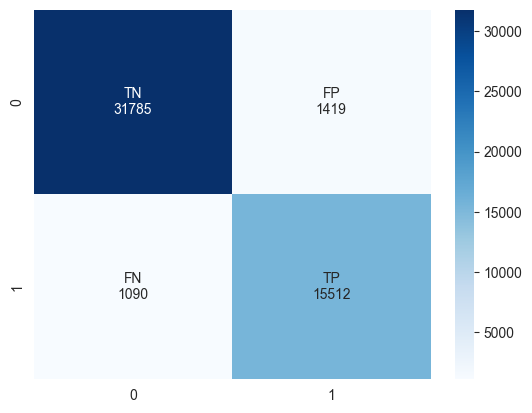

2025-02-04 17:30:43,210 - INFO - Testing Accuracy: 0.94 

2025-02-04 17:30:43,211 - INFO - Testing Confusion matrix:
[[8419  381]
 [ 414 3986]]
2025-02-04 17:30:43,212 - INFO - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      8800
           1       0.91      0.91      0.91      4400

    accuracy                           0.94     13200
   macro avg       0.93      0.93      0.93     13200
weighted avg       0.94      0.94      0.94     13200



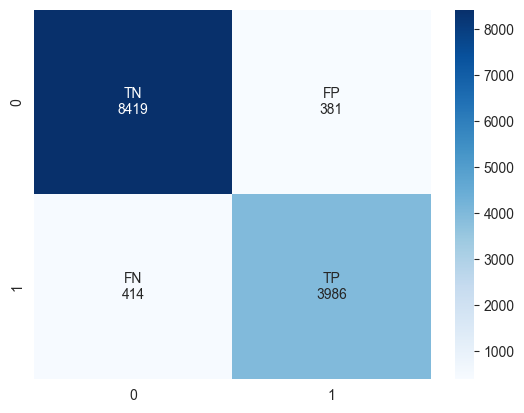

2025-02-04 17:30:44,194 - INFO - Model evaluation report: {'Training_accuracy': 0.9496245432277236, 'Training_report': '              precision    recall  f1-score   support\n\n           0       0.97      0.96      0.96     33204\n           1       0.92      0.93      0.93     16602\n\n    accuracy                           0.95     49806\n   macro avg       0.94      0.95      0.94     49806\nweighted avg       0.95      0.95      0.95     49806\n', 'Training_matrix': array([[31785,  1419],
       [ 1090, 15512]]), 'Training_f1_score': 0.9436042398771864, 'Training_recall': (array([0.33333333, 0.91618924, 1.        ]), array([1.        , 0.93434526, 0.        ]), array([0, 1])), 'Testing_accuracy': 0.9397727272727273, 'Testing_report': '              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.95      8800\n           1       0.91      0.91      0.91      4400\n\n    accuracy                           0.94     13200\n   macro avg       0.93   

In [40]:
from sklearn.ensemble import RandomForestClassifier
rdf_param_space = {
    'n_estimators': (50, 100, 200, 300),  # Number of trees in the forest
    'max_depth': (None, 10, 20, 30),  # Maximum depth of the tree
    'min_samples_split': (2, 5, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': (1, 2, 4),  # Minimum number of samples required to be at a leaf node
}

rdf_model_func = RandomForestClassifier

filename = "trained_models/rdf_model.sav"

rdf_trained_model, evaluation_report = train_and_evaluate_model(rdf_model_func, data_dict, rdf_param_space, filename)

2025-02-04 17:30:50,278 - INFO - Loaded existing model from file.
2025-02-04 17:30:53,812 - INFO - Training Accuracy: 0.94 

2025-02-04 17:30:53,812 - INFO - Training Confusion matrix:
[[31499  1705]
 [ 1425 15177]]
2025-02-04 17:30:53,812 - INFO - Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     33204
           1       0.90      0.91      0.91     16602

    accuracy                           0.94     49806
   macro avg       0.93      0.93      0.93     49806
weighted avg       0.94      0.94      0.94     49806



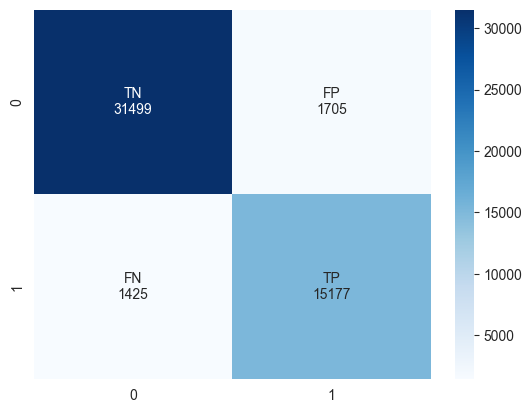

2025-02-04 17:30:54,974 - INFO - Testing Accuracy: 0.95 

2025-02-04 17:30:54,976 - INFO - Testing Confusion matrix:
[[8398  402]
 [ 271 4129]]
2025-02-04 17:30:54,977 - INFO - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8800
           1       0.91      0.94      0.92      4400

    accuracy                           0.95     13200
   macro avg       0.94      0.95      0.94     13200
weighted avg       0.95      0.95      0.95     13200



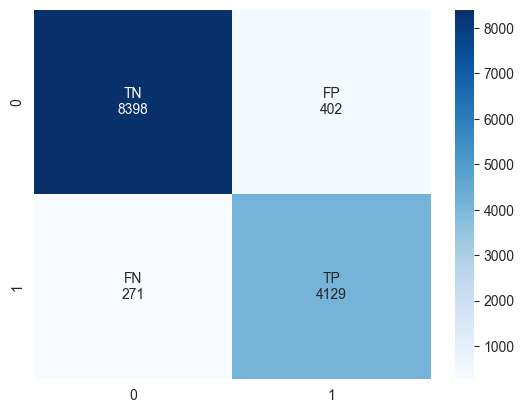

2025-02-04 17:30:55,273 - INFO - Model evaluation report: {'Training_accuracy': 0.9371561659237843, 'Training_report': '              precision    recall  f1-score   support\n\n           0       0.96      0.95      0.95     33204\n           1       0.90      0.91      0.91     16602\n\n    accuracy                           0.94     49806\n   macro avg       0.93      0.93      0.93     49806\nweighted avg       0.94      0.94      0.94     49806\n', 'Training_matrix': array([[31499,  1705],
       [ 1425, 15177]]), 'Training_f1_score': 0.9295950360263214, 'Training_recall': (array([0.33333333, 0.89900486, 1.        ]), array([1.        , 0.91416697, 0.        ]), array([0, 1])), 'Testing_accuracy': 0.9490151515151515, 'Testing_report': '              precision    recall  f1-score   support\n\n           0       0.97      0.95      0.96      8800\n           1       0.91      0.94      0.92      4400\n\n    accuracy                           0.95     13200\n   macro avg       0.94   

In [41]:
from sklearn.ensemble import AdaBoostClassifier

ada_param_space = {
    "n_estimators": (50, 100, 200, 300, 500),  # Number of weak learners in the ensemble
    "learning_rate": (0.01, 0.05, 0.1, 0.5,  1.0),  # Weight applied to each classifier
}

ada_model_func = AdaBoostClassifier
filename = "trained_models/ada_model.sav"

ada_trained_model, evaluation_report = train_and_evaluate_model(ada_model_func, data_dict, ada_param_space, filename)


2025-02-04 17:30:55,701 - INFO - Loaded existing model from file.
2025-02-04 17:30:55,780 - INFO - Training Accuracy: 0.93 

2025-02-04 17:30:55,780 - INFO - Training Confusion matrix:
[[31912  1292]
 [ 2237 14365]]
2025-02-04 17:30:55,780 - INFO - Training Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     33204
           1       0.92      0.87      0.89     16602

    accuracy                           0.93     49806
   macro avg       0.93      0.91      0.92     49806
weighted avg       0.93      0.93      0.93     49806



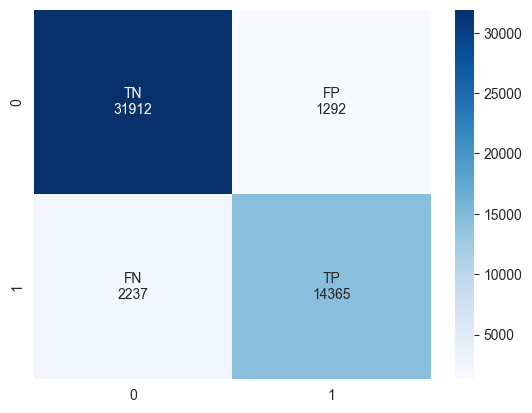

2025-02-04 17:30:56,129 - INFO - Testing Accuracy: 0.94 

2025-02-04 17:30:56,130 - INFO - Testing Confusion matrix:
[[8489  311]
 [ 451 3949]]
2025-02-04 17:30:56,131 - INFO - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      8800
           1       0.93      0.90      0.91      4400

    accuracy                           0.94     13200
   macro avg       0.94      0.93      0.93     13200
weighted avg       0.94      0.94      0.94     13200



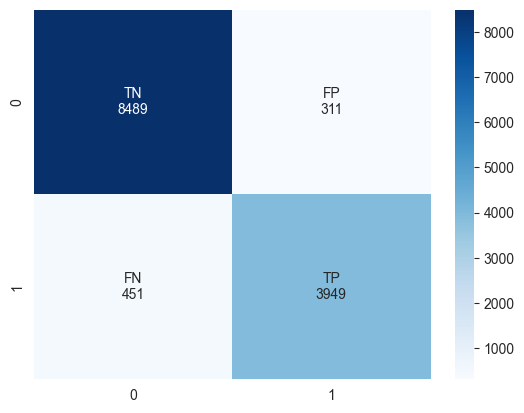

2025-02-04 17:30:56,577 - INFO - Model evaluation report: {'Training_accuracy': 0.9291450829217364, 'Training_report': '              precision    recall  f1-score   support\n\n           0       0.93      0.96      0.95     33204\n           1       0.92      0.87      0.89     16602\n\n    accuracy                           0.93     49806\n   macro avg       0.93      0.91      0.92     49806\nweighted avg       0.93      0.93      0.93     49806\n', 'Training_matrix': array([[31912,  1292],
       [ 2237, 14365]]), 'Training_f1_score': 0.9191042925257817, 'Training_recall': (array([0.33333333, 0.917481  , 1.        ]), array([1.       , 0.8652572, 0.       ]), array([0, 1])), 'Testing_accuracy': 0.9422727272727273, 'Testing_report': '              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.96      8800\n           1       0.93      0.90      0.91      4400\n\n    accuracy                           0.94     13200\n   macro avg       0.94      

In [42]:
from sklearn.linear_model import LogisticRegression

log_reg_param_space = { 
    "C": (0.01, 0.05, 0.1, 0.5, 1.0, 5, 10.0),  # Regularization strength
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],  # Solver for optimization
    "max_iter": (50, 100, 500)  # Maximum number of iterations
}

log_reg_model_func = LogisticRegression
filename = "trained_models\\log_reg_model.sav"

log_reg_trained_model, evaluation_report = train_and_evaluate_model(log_reg_model_func, data_dict, log_reg_param_space, filename=filename)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_param_space = {
    "n_estimators": (50, 100, 200, 300, 500),  # Number of boosting stages
    "learning_rate": (0.01, 0.05, 0.1, 0.5, 1.0),  # Shrinks the contribution of each tree
    "max_depth": (3, 5, 10, 15, 30, 60, 90, 100),  # Depth of the individual estimators
    "min_samples_split": (2, 5, 8, 10, 15, 30, 60, 90)  # Minimum number of samples to split a node
}

gb_model_func = GradientBoostingClassifier
filename = "trained_models/gb_model.sav"

gb_trained_model, evaluation_report = train_and_evaluate_model(gb_model_func, data_dict, gb_param_space, filename)


2025-02-04 17:45:40,297 - INFO - No existing model found. Starting training.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_param_space = {
    "loss": ["hinge", "log", "modified_huber", "squared_hinge"],  # Loss function
    "penalty": ["l1", "l2", "elasticnet"],  # Regularization penalty
    "alpha": (0.0001, 0.1),  # Regularization term strength
    "max_iter": (1000, 5000),  # Maximum number of iterations
    "learning_rate": ["constant", "optimal", "invscaling", "adaptive"]
}

sgd_model_func = SGDClassifier
filename = "trained_models/sgd_model.sav"

sgd_trained_model, evaluation_report = train_and_evaluate_model(sgd_model_func, data_dict, sgd_param_space, filename)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_param_space = {
    "alpha": (0.01, 1.0),  # Additive smoothing parameter
    "fit_prior": [True, False]  # Whether to learn class priors
}

nb_model_func = MultinomialNB
filename = "trained_models/nb_model.sav"

nb_trained_model, evaluation_report = train_and_evaluate_model(nb_model_func, data_dict, nb_param_space, filename)


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_param_space = {
    "var_smoothing": (1e-9, 1e-6)  # Portion of the largest variance of all features added to variances
}

gnb_model_func = GaussianNB
filename = "trained_models/gnb_model.sav"

gnb_trained_model, evaluation_report = train_and_evaluate_model(gnb_model_func, data_dict, gnb_param_space, filename)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_param_space = {
    "criterion": ["gini", "entropy", "log_loss"], # Splitting criterion
    "max_depth": (None, 10, 20, 30, 40, 50, 60),  # Maximum depth of the tree
    "min_samples_split": (2, 5, 10, 20, 25, 30),  # Minimum samples required to split
    "min_samples_leaf": (1, 10, 15, 20, 25, 30),  # Minimum samples per leaf
    "max_features": ["sqrt", "log2", None]  # Number of features to consider for the best split
}

dt_model_func = DecisionTreeClassifier
filename = "trained_models/dt_model.sav"

dt_trained_model, evaluation_report = train_and_evaluate_model(dt_model_func, data_dict, dt_param_space, filename)


In [ ]:
from xgboost import XGBClassifier

xgb_param_space = {
    "n_estimators": (50, 300),  # Number of boosting rounds
    "learning_rate": (0.01, 0.5),  # Shrinking the weights
    "max_depth": (3, 10),  # Maximum tree depth
    "subsample": (0.5, 1.0),  # Subsample ratio
    "colsample_bytree": (0.5, 1.0),  # Fraction of features per tree
}

xgb_model_func = XGBClassifier
filename = "trained_models/xgb_model.sav"

xgb_trained_model, evaluation_report = train_and_evaluate_model(xgb_model_func, data_dict, xgb_param_space, filename)

In [ ]:
from lightgbm import LGBMClassifier

lgb_param_space = {
    "n_estimators": (50, 300),  # Number of boosting rounds
    "learning_rate": (0.01, 0.5),  # Step size shrinkage
    "num_leaves": (20, 50),  # Maximum number of leaves
    "min_data_in_leaf": (10, 50),  # Minimum number of samples in a leaf
    "feature_fraction": (0.5, 1.0)  # Fraction of features used
}

lgb_model_func = LGBMClassifier
filename = "trained_models/lgb_model.sav"

lgb_trained_model, evaluation_report = train_and_evaluate_model(lgb_model_func, data_dict, lgb_param_space, filename)

In [ ]:
from sklearn.svm import SVC

svc_param_space = {
    "C": (0.1, 10.0),  # Regularization parameter
    "kernel": ["linear", "poly", "rbf", "sigmoid"],  # Kernel type
    "gamma": ("scale", "auto"),  # Kernel coefficient
    "degree": (2, 5)  # Degree for polynomial kernel
}

svc_model_func = LGBMClassifier
filename = "trained_models/svc_model.sav"

svc_trained_model, evaluation_report = train_and_evaluate_model(svc_model_func, data_dict, svc_param_space, filename)